In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\lanmo\Downloads\train.xlsx")

In [3]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [4]:
df.head()

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,2023-04-20 20:39:15,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,NaT,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,NaT,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,NaT,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,NaT,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1


In [5]:
df[df['Стоимость'] == max(df['Стоимость'])]

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
10011,20230801-6634-192772878,1,986400.0,39400,Отложенная электронная оплата: Банк Россия (ба...,2023-04-09 16:51:55,NaT,2023-08-01 15:00:00,26,2023-08-27 12:00:00,Официальный сайт,Активный,Коттедж с 3 спальнями,5,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26174 entries, 0 to 26173
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   № брони             26174 non-null  object        
 1   Номеров             26174 non-null  int64         
 2   Стоимость           26174 non-null  float64       
 3   Внесена предоплата  26174 non-null  int64         
 4   Способ оплаты       26174 non-null  object        
 5   Дата бронирования   26174 non-null  datetime64[ns]
 6   Дата отмены         5192 non-null   datetime64[ns]
 7   Заезд               26174 non-null  datetime64[ns]
 8   Ночей               26174 non-null  int64         
 9   Выезд               26174 non-null  datetime64[ns]
 10  Источник            26174 non-null  object        
 11  Статус брони        26174 non-null  object        
 12  Категория номера    26174 non-null  object        
 13  Гостей              26174 non-null  int64     

In [7]:
df.isna().sum()/len(df) * 100

№ брони                0.000000
Номеров                0.000000
Стоимость              0.000000
Внесена предоплата     0.000000
Способ оплаты          0.000000
Дата бронирования      0.000000
Дата отмены           80.163521
Заезд                  0.000000
Ночей                  0.000000
Выезд                  0.000000
Источник               0.000000
Статус брони           0.000000
Категория номера       0.000000
Гостей                 0.000000
Гостиница              0.000000
dtype: float64

In [8]:
df = df.fillna(0)

In [9]:
def replace(x):
    if x != 0:
        return 1
    else:
        return 0

In [10]:
df['Дата отмены'] = df['Дата отмены'].apply(replace)

In [11]:
df

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата бронирования,Дата отмены,Заезд,Ночей,Выезд,Источник,Статус брони,Категория номера,Гостей,Гостиница
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,2023-04-20 20:37:30,1,2023-04-28 15:00:00,3,2023-05-01 12:00:00,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,2022-06-18 14:17:02,0,2022-07-11 15:00:00,2,2022-07-13 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,1
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),2022-11-14 22:59:30,0,2022-12-04 15:00:00,2,2022-12-06 12:00:00,Официальный сайт,Активный,Номер «Студия»,2,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),2023-09-08 15:55:53,0,2023-09-18 15:00:00,1,2023-09-19 12:00:00,Bronevik.com(new),Активный,Номер «Стандарт»,1,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,2023-05-20 19:54:13,0,2023-05-29 15:00:00,2,2023-05-31 12:00:00,Официальный сайт,Активный,Номер «Люкс»,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,20230310-7492-177993190,1,18240.0,9120,Банк. карта: Банк Россия (банк. карта),2023-01-07 17:45:18,0,2023-03-10 15:00:00,2,2023-03-12 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26170,20230625-16563-206126520,1,69600.0,23200,Банк. карта: Банк Россия (банк. карта),2023-06-20 17:54:17,0,2023-06-25 15:00:00,3,2023-06-28 12:00:00,Официальный сайт,Активный,Номер «Студия»,3,4
26171,20220624-7492-137587082,1,55600.0,13900,Банк. карта: Банк Россия (банк. карта),2022-05-08 19:24:05,0,2022-06-24 15:00:00,4,2022-06-28 12:00:00,Официальный сайт,Активный,Номер «Стандарт»,2,2
26172,20220427-7491-125459150,1,6300.0,0,Гарантия банковской картой,2022-02-19 09:55:50,1,2022-04-27 15:00:00,1,2022-04-28 12:00:00,booking.com,Отмена,Номер «Стандарт»,2,3


In [12]:
df['month'] = df['Дата бронирования'].apply(lambda x : x.strftime('%m'))
df['weekday'] = df['Дата бронирования'].apply(lambda x : x.strftime('%a'))
df['delta_day'] = (df['Заезд'] - df['Дата бронирования']).dt.days
df['Year'] = df['Дата бронирования'].dt.year
df['Quartal'] = df['Дата бронирования'].dt.quarter

In [13]:
df1 = df.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [14]:
df1.head(10)

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Источник,Статус брони,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal
0,20230428-6634-194809261,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Отмена,Номер «Стандарт»,2,1,04,Thu,7,2023,2
1,20220711-6634-144460018,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,Официальный сайт,Активный,Номер «Стандарт»,2,1,06,Sat,23,2022,2
2,20221204-16563-171020423,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,Официальный сайт,Активный,Номер «Студия»,2,4,11,Mon,19,2022,4
3,20230918-7491-223512699,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,Bronevik.com(new),Активный,Номер «Стандарт»,1,3,09,Fri,9,2023,3
4,20230529-6634-200121971,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,Официальный сайт,Активный,Номер «Люкс»,4,1,05,Sat,8,2023,2
5,20230904-7491-218448208,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),1,4,Официальный сайт,Отмена,Номер «Стандарт»,3,3,08,Tue,20,2023,3
6,20220218-7492-124990127,1,7650.0,0,Гарантия банковской картой,1,1,booking.com,Отмена,Номер «Стандарт»,1,2,02,Tue,2,2022,1
7,20230921-7491-221547353,1,26200.0,0,Внешняя система оплаты (Оплата наличными),0,2,Bronevik.com(new),Активный,Номер «Стандарт»,2,3,08,Tue,22,2023,3
8,20230625-7491-204432766,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,1,1,Официальный сайт,Отмена,Номер «Стандарт»,2,3,06,Mon,12,2023,2
9,20240122-6634-234004847,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),0,1,Официальный сайт,Активный,Номер «Стандарт»,2,1,11,Wed,85,2023,4


In [15]:
df_month = pd.DataFrame(df1.groupby(['month','Дата отмены'])
.size()
.reset_index())

In [16]:
import seaborn as sns

<Axes: xlabel='month', ylabel='0'>

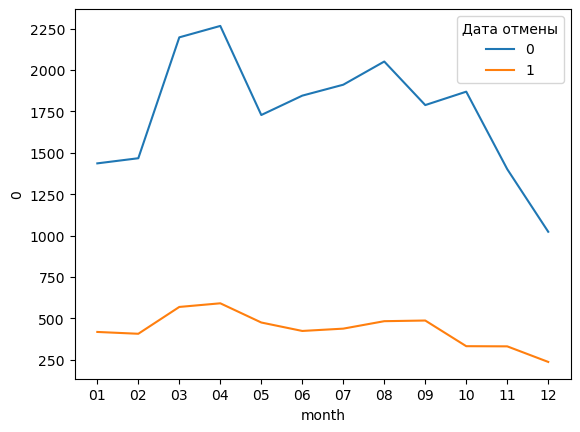

In [17]:
sns.lineplot(df_month, x ='month',y=0,hue = 'Дата отмены')

<Axes: xlabel='weekday', ylabel='0'>

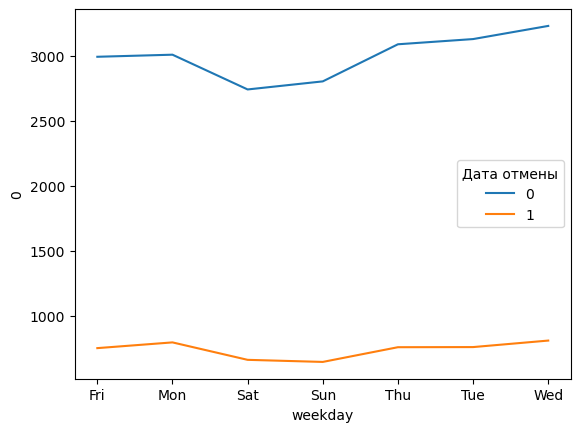

In [18]:
df_day = pd.DataFrame(df1.groupby(['weekday','Дата отмены'])
.size()
.reset_index())
sns.lineplot(df_day, x ='weekday',y=0,hue = 'Дата отмены')
#Тут приблизительно в одном разбросе 

In [19]:
inde = df1[df1['delta_day'] == -1].index
df1.loc[inde,'delta_day'] = 0

In [20]:
df1.drop(['weekday','Статус брони','№ брони'],axis = 1,inplace = True)

In [21]:
df1.head(5)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Источник,Категория номера,Гостей,Гостиница,month,delta_day,Year,Quartal
0,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2023,2
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,Официальный сайт,Номер «Стандарт»,2,1,06,23,2022,2
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,Официальный сайт,Номер «Студия»,2,4,11,19,2022,4
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,Bronevik.com(new),Номер «Стандарт»,1,3,09,9,2023,3
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,Официальный сайт,Номер «Люкс»,4,1,05,8,2023,2


In [22]:
df1.groupby(["Quartal",'Дата отмены']).size()

Quartal  Дата отмены
1        0              5100
         1              1394
2        0              5839
         1              1490
3        0              5750
         1              1408
4        0              4293
         1               900
dtype: int64

# Тут год ничего не даёт

In [23]:
df1.groupby(['Year','Дата отмены']).size()

Year  Дата отмены
2022  0              10509
      1               2692
2023  0              10473
      1               2500
dtype: int64

In [24]:
df1.rename(columns = {'Источник':'Source'}, inplace = True )

In [25]:
s = df1.Source.value_counts()

In [26]:
df1['source_count'] = df1['Source'].map(s)

In [27]:
df1.loc[df1['Source'] == "Официальный сайт", "Source"] = "official_website"
df1.loc[df1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df1.loc[df1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df1.loc[df1['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [28]:
df1.drop(['source_count','Year'],axis = 1,inplace =True)

In [29]:
df1.head(10)

,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal
0,1,25700.0,0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2
1,1,24800.0,12400,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2
2,1,25800.0,12900,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4
3,1,10500.0,0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3
4,1,28690.0,28690,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2
5,1,39100.0,8755,Банк. карта: Банк Россия (банк. карта),1,4,official_website,Номер «Стандарт»,3,3,08,20,3
6,1,7650.0,0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,1,2,02,2,1
7,1,26200.0,0,Внешняя система оплаты (Оплата наличными),0,2,small_online_service,Номер «Стандарт»,2,3,08,22,3
8,1,14400.0,0,Отложенная электронная оплата: Банк Россия (ба...,1,1,official_website,Номер «Стандарт»,2,3,06,12,2
9,1,11200.0,6700,Банк. карта: Банк Россия (банк. карта),0,1,official_website,Номер «Стандарт»,2,1,11,85,4


# Гостиницы

In [30]:
pd.DataFrame(df1.groupby(['Гостиница','Дата отмены']).size()).rename({0:'count'},axis =1)

count
Гостиница Дата отмены       
1         0             6798
          1             1685
2         0             5969
          1             1399
3         0             6424
          1             1582
4         0             1791
          1              526

In [31]:
df1.describe()

,Номеров,Стоимость,Внесена предоплата,Дата отмены,Ночей,Гостей,Гостиница,delta_day,Quartal
count,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000,26174.000000
mean,1.088714,35099.784232,19536.728165,0.198365,2.151295,2.601628,2.158822,28.101933,2.422175
std,0.341145,38849.552238,27776.602024,0.398776,1.456076,1.199428,0.979224,32.537671,1.066307
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,14300.000000,7800.000000,0.000000,1.000000,2.000000,1.000000,5.000000,2.000000
50%,1.000000,23800.000000,13900.000000,0.000000,2.000000,2.000000,2.000000,17.000000,2.000000
75%,1.000000,41100.000000,23180.000000,0.000000,3.000000,3.000000,3.000000,39.000000,3.000000
max,6.000000,986400.000000,584500.000000,1.000000,31.000000,16.000000,4.000000,284.000000,4.000000


In [32]:
df1['% внесена предоплата к стоимости'] = (df['Внесена предоплата']/df['Стоимость']).apply(lambda x:round(x,2))

In [33]:
df1.drop('Внесена предоплата',axis = 1,inplace = True)

In [34]:
df1.head()

,Номеров,Стоимость,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2,0.0
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2,0.5
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4,0.5
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3,0.0
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2,1.0


In [35]:
df1.groupby(['Гостей','Дата отмены']).size() #Гостей поменять на категориальную 

Гостей  Дата отмены
1       0               1256
        1                356
2       0              12282
        1               2833
3       0               3708
        1                972
4       0               2471
        1                683
5       0                652
        1                160
6       0                349
        1                 95
7       0                118
        1                 43
8       0                 92
        1                 26
9       0                 20
        1                  6
10      0                 25
        1                  9
11      0                  3
        1                  1
12      0                  2
        1                  4
13      0                  1
        1                  2
14      0                  2
        1                  1
15      1                  1
16      0                  1
dtype: int64

def obid(x):
    if x >= 8:
        return 'Много гостей'
    elif x<8 and x >= 5:
        return 'Среднее количество гостей'
    else:
        return 'Малое количество гостей'

df1['колво-гостей'] = df1['Гостей'].apply(obid)
df2 = df1.drop('Гостей',axis=1)

In [36]:
df2 = df1

In [37]:
df2.head(10)

,Номеров,Стоимость,Способ оплаты,Дата отмены,Ночей,Source,Категория номера,Гостей,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,1,04,7,2,0.00
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,1,06,23,2,0.50
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,4,11,19,4,0.50
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,3,09,9,3,0.00
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,1,05,8,2,1.00
5,1,39100.0,Банк. карта: Банк Россия (банк. карта),1,4,official_website,Номер «Стандарт»,3,3,08,20,3,0.22
6,1,7650.0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,1,2,02,2,1,0.00
7,1,26200.0,Внешняя система оплаты (Оплата наличными),0,2,small_online_service,Номер «Стандарт»,2,3,08,22,3,0.00
8,1,14400.0,Отложенная электронная оплата: Банк Россия (ба...,1,1,official_website,Номер «Стандарт»,2,3,06,12,2,0.00
9,1,11200.0,Банк. карта: Банк Россия (банк. карта),0,1,official_website,Номер «Стандарт»,2,1,11,85,4,0.60


In [38]:
df2.rename(columns = {'Категория номера':'Room_category'}, inplace = True )

In [39]:
total_rooms = df2['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df2['Room_category'] = df2['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

In [40]:
df2.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [41]:
total_payment = df2['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df2['Payment'] = df2['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

In [42]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df2['Регионы'] = df2['Гостиница'].apply(reg)
df2.drop('Гостиница',axis =1,inplace=True)

In [43]:
df2

,Номеров,Стоимость,Payment,Дата отмены,Ночей,Source,Room_category,Гостей,month,delta_day,Quartal,% внесена предоплата к стоимости,Регионы
0,1,25700.0,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,2,04,7,2,0.00,1
1,1,24800.0,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,2,06,23,2,0.50,1
2,1,25800.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,2,11,19,4,0.50,0
3,1,10500.0,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,1,09,9,3,0.00,0
4,1,28690.0,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,4,05,8,2,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,18240.0,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Стандарт»,2,01,61,1,0.50,1
26170,1,69600.0,Банк. карта: Банк Россия (банк. карта),0,3,official_website,Номер «Студия»,3,06,4,2,0.33,0
26171,1,55600.0,Банк. карта: Банк Россия (банк. карта),0,4,official_website,Номер «Стандарт»,2,05,46,2,0.25,1
26172,1,6300.0,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,2,02,67,1,0.00,0


In [44]:
df2['стоимсот/челове'] = df2['Стоимость']/df2['Гостей']

In [45]:
df2.drop(['Стоимость','Гостей'],axis = 1,inplace = True)

In [46]:
df2

,Номеров,Payment,Дата отмены,Ночей,Source,Room_category,month,delta_day,Quartal,% внесена предоплата к стоимости,Регионы,стоимсот/челове
0,1,Внешняя система оплаты,1,3,Яндекс.Путешествия,Номер «Стандарт»,04,7,2,0.00,1,12850.0
1,1,Отложенная электронная оплата: Банк Россия (ба...,0,2,official_website,Номер «Стандарт»,06,23,2,0.50,1,12400.0
2,1,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Студия»,11,19,4,0.50,0,12900.0
3,1,Внешняя система оплаты (С предоплатой),0,1,small_online_service,Номер «Стандарт»,09,9,3,0.00,0,10500.0
4,1,Система быстрых платежей: Эквайринг ComfortBoo...,0,2,official_website,Номер «Люкс»,05,8,2,1.00,1,7172.5
...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,Банк. карта: Банк Россия (банк. карта),0,2,official_website,Номер «Стандарт»,01,61,1,0.50,1,9120.0
26170,1,Банк. карта: Банк Россия (банк. карта),0,3,official_website,Номер «Студия»,06,4,2,0.33,0,23200.0
26171,1,Банк. карта: Банк Россия (банк. карта),0,4,official_website,Номер «Стандарт»,05,46,2,0.25,1,27800.0
26172,1,Гарантия банковской картой,1,1,booking.com,Номер «Стандарт»,02,67,1,0.00,0,3150.0


In [47]:
df0 = pd.get_dummies(df2,columns = ['Source','month','Payment','Room_category','Quartal'],drop_first=True,dtype = int)

In [48]:
df0

,Номеров,Дата отмены,Ночей,delta_day,% внесена предоплата к стоимости,Регионы,стоимсот/челове,Source_official_website,Source_ostrovok.ru,Source_small_online_service,...,Payment_Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей),Room_category_Апартаменты с 2 спальнями с отдельным входом,Room_category_Коттедж с 2 спальнями,Room_category_Коттедж с 3 спальнями,Room_category_Номер «Люкс»,Room_category_Номер «Стандарт»,Room_category_Номер «Студия»,Quartal_2,Quartal_3,Quartal_4
0,1,1,3,7,0.00,1,12850.0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,2,23,0.50,1,12400.0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,0,2,19,0.50,0,12900.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,1,9,0.00,0,10500.0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
4,1,0,2,8,1.00,1,7172.5,1,0,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26169,1,0,2,61,0.50,1,9120.0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
26170,1,0,3,4,0.33,0,23200.0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
26171,1,0,4,46,0.25,1,27800.0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
26172,1,1,1,67,0.00,0,3150.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(df0['Дата отмены']), y=df0['Дата отмены'])

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [51]:
rf.fit(df0.drop('Дата отмены',axis = 1),df0['Дата отмены'])

RandomForestClassifier()

In [52]:
feature = pd.DataFrame({'name':df0.drop('Дата отмены',axis = 1).columns,'featue':rf.feature_importances_}).sort_values('featue',ascending = False)

In [53]:
feature # Узнать как влияет

,name,featue
3,% внесена предоплата к стоимости,0.259007
2,delta_day,0.203132
5,стоимсот/челове,0.175128
28,Payment_Отложенная электронная оплата: Банк Ро...,0.090738
1,Ночей,0.035495
24,Payment_Банк. карта: Банк Россия (банк. карта),0.021613
4,Регионы,0.015894
26,Payment_Внешняя система оплаты (С предоплатой),0.013576
0,Номеров,0.012421
25,Payment_Внешняя система оплаты,0.012353


In [54]:
feat = list(feature.loc[feature['featue']>0.001,'name'])

In [55]:
feat

['% внесена предоплата к стоимости',
 'delta_day',
 'стоимсот/челове',
 'Payment_Отложенная электронная оплата: Банк Россия (банк. карта)',
 'Ночей',
 'Payment_Банк. карта: Банк Россия (банк. карта)',
 'Регионы',
 'Payment_Внешняя система оплаты (С предоплатой)',
 'Номеров',
 'Payment_Внешняя система оплаты',
 'Source_Яндекс.Путешествия',
 'Source_official_website',
 'Source_Бронирование из экстранета',
 'Room_category_Номер «Стандарт»',
 'Payment_Система быстрых платежей: Эквайринг ComfortBooking (Система быстрых платежей)',
 'Room_category_Номер «Студия»',
 'Payment_При заселении',
 'Payment_Гарантия банковской картой',
 'month_03',
 'month_02',
 'Source_ostrovok.ru',
 'Quartal_3',
 'Quartal_2',
 'Room_category_Апартаменты с 2 спальнями с отдельным входом',
 'month_08',
 'Source_small_online_service',
 'month_09',
 'month_04',
 'Quartal_4',
 'month_05',
 'Payment_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта)',
 'month_06',
 'month_07',
 'Room_category_Номер «Люкс»

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X = df0[feat]
y = df0['Дата отмены']

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_osn_scal = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)

In [141]:
import matplotlib.pyplot as plt

C:\Users\lanmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


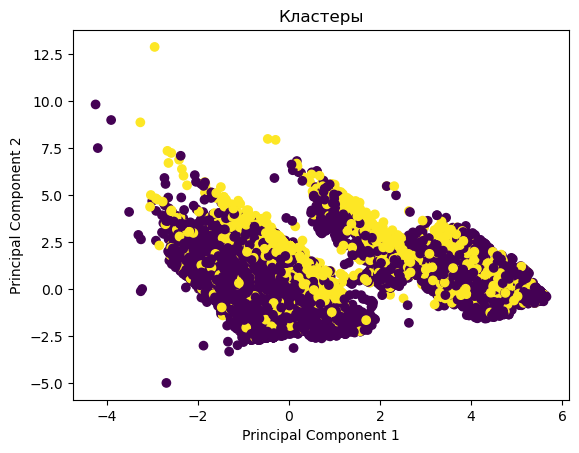

Silhouette Score: 0.22303183816773994
Davies-Bouldin Index: 2.662520129839561


In [145]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Определите количество кластеров (K) и создайте объект KMeans:
K = 2  # Выберите подходящее значение K
kmeans = KMeans(n_clusters=K, random_state=42)

# Обучите модель KMeans на данных:
kmeans.fit(X_osn_scal)

# Добавьте столбец с метками кластеров в исходный DataFrame:
X_osn_scal['Cluster'] = kmeans.labels_

# Проанализируйте результаты кластеризации. Вы можете визуализировать данные с помощью PCA или TSNE, чтобы лучше понять структуру кластеров:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_osn_scal)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Кластеры')
plt.show()

# Если вы хотите оценить качество кластеризации, вы можете использовать метрики, такие как silhouette score или Davies-Bouldin index. Для этого вам нужно будет импортировать соответствующие функции из sklearn.metrics:
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("Silhouette Score:", silhouette_score(X_osn_scal, kmeans.labels_))
print("Davies-Bouldin Index:", davies_bouldin_score(X_osn_scal, kmeans.labels_))


In [147]:
X_train,X_test,y_train,y_test = train_test_split(X_osn_scal,y,stratify=y)

import numpy as np
from catboost import CatBoostClassifier

# Создание ансамбля из 10 случайных моделей CatBoost
ensemble = [CatBoostClassifier(learning_rate=0.01, iterations=2000, depth=4, l2_leaf_reg=3, eval_metric='AUC', class_weights=dict(enumerate(class_weights))) for _ in range(10)]

# Количество выборок для каждой модели (90% от обучающей выборки)
n_samples = int(len(X_train) * 0.9)

for model in ensemble:
    # Получаем случайные позиционные индексы для подмножества строк
    sample_indices = np.random.choice(len(X_train), size=n_samples, replace=True)
    
    # Выбор подмножества данных по строкам с помощью iloc (по позиционным индексам)
    X_subset, y_subset = X_train.iloc[sample_indices], y_train.iloc[sample_indices]
    
    # Обучение модели на подмножестве данных
    model.fit(X_subset, y_subset)



# Предсказания каждой модели ансамбля на тестовой выборке
predictions = np.array([model.predict_proba(X_test)[:,1] for model in ensemble])

# Финальные предсказания (например, усреднение предсказаний)
final_predictions = np.mean(predictions, axis=0)

print(final_predictions)

roc_auc_score(y_test,final_predictions)

from imblearn.over_sampling import ADASYN
adasyn = ADASYN()

# Применение SMOTE к данным
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

In [148]:
from catboost import CatBoostClassifier, CatBoostRegressor, Pool

cat_features  = ['Source','month','Payment','Room_category','колво-гостей','Quartal','Гостиница']
train_data = Pool(X_train, 
                  label=y_train, 
                  cat_features=cat_features)

test_data = Pool(X_test, 
                  label=y_test, 
                  cat_features=cat_features)

In [149]:
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

In [62]:
model = CatBoostClassifier(eval_metric='AUC',class_weights=dict(enumerate(class_weights)))

In [ ]:
model = CatBoostClassifier(eval_metric='AUC',class_weights=dict(enumerate(class_weights)))
param_grid = {
    'learning_rate': [0.01, 0.0034,0.0023],
    'depth': [3,5, 7,8],
    'iterations': [1000, 1500, 2500, 3500]
}
grid_search_result = model.grid_search(param_grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8298096	best: 0.8298096 (0)	total: 9.4ms	remaining: 9.39s
1:	test: 0.8401401	best: 0.8401401 (1)	total: 18.1ms	remaining: 9.04s
2:	test: 0.8465253	best: 0.8465253 (2)	total: 25.6ms	remaining: 8.51s
3:	test: 0.8461475	best: 0.8465253 (2)	total: 34.1ms	remaining: 8.48s
4:	test: 0.8473066	best: 0.8473066 (4)	total: 40.8ms	remaining: 8.13s
5:	test: 0.8476911	best: 0.8476911 (5)	total: 47ms	remaining: 7.78s
6:	test: 0.8504420	best: 0.8504420 (6)	total: 54.6ms	remaining: 7.74s
7:	test: 0.8494650	best: 0.8504420 (6)	total: 60.1ms	remaining: 7.45s
8:	test: 0.8523404	best: 0.8523404 (8)	total: 67.5ms	remaining: 7.43s
9:	test: 0.8522768	best: 0.8523404 (8)	total: 74.5ms	remaining: 7.38s
10:	test: 0.8525144	best: 0.8525144 (10)	total: 81ms	remaining: 7.28s
11:	test: 0.8528338	best: 0.8528338 (11)	total: 88.4ms	remaining: 7.28s
12:	test: 0.8539066	best: 0.8539066 (12)	total: 93.8ms	remaining: 7.12s
13:	test: 0.8540184	best: 0.8540184 (13)	total: 101ms	remaining: 7.09s
14:	test: 0.853843

138:	test: 0.8554346	best: 0.8560943 (32)	total: 1.05s	remaining: 6.48s
139:	test: 0.8554489	best: 0.8560943 (32)	total: 1.05s	remaining: 6.47s
140:	test: 0.8556265	best: 0.8560943 (32)	total: 1.06s	remaining: 6.47s
141:	test: 0.8557783	best: 0.8560943 (32)	total: 1.07s	remaining: 6.47s
142:	test: 0.8557675	best: 0.8560943 (32)	total: 1.08s	remaining: 6.46s
143:	test: 0.8558844	best: 0.8560943 (32)	total: 1.08s	remaining: 6.45s
144:	test: 0.8560744	best: 0.8560943 (32)	total: 1.09s	remaining: 6.44s
145:	test: 0.8561752	best: 0.8561752 (145)	total: 1.1s	remaining: 6.43s
146:	test: 0.8562009	best: 0.8562009 (146)	total: 1.11s	remaining: 6.42s
147:	test: 0.8563266	best: 0.8563266 (147)	total: 1.11s	remaining: 6.41s
148:	test: 0.8564137	best: 0.8564137 (148)	total: 1.12s	remaining: 6.41s
149:	test: 0.8564626	best: 0.8564626 (149)	total: 1.13s	remaining: 6.42s
150:	test: 0.8565564	best: 0.8565564 (150)	total: 1.14s	remaining: 6.43s
151:	test: 0.8566617	best: 0.8566617 (151)	total: 1.15s	rem

273:	test: 0.8592793	best: 0.8592793 (273)	total: 2.08s	remaining: 5.5s
274:	test: 0.8591661	best: 0.8592793 (273)	total: 2.08s	remaining: 5.49s
275:	test: 0.8592010	best: 0.8592793 (273)	total: 2.09s	remaining: 5.48s
276:	test: 0.8592238	best: 0.8592793 (273)	total: 2.1s	remaining: 5.47s
277:	test: 0.8592798	best: 0.8592798 (277)	total: 2.11s	remaining: 5.47s
278:	test: 0.8593134	best: 0.8593134 (278)	total: 2.11s	remaining: 5.46s
279:	test: 0.8593569	best: 0.8593569 (279)	total: 2.12s	remaining: 5.46s
280:	test: 0.8593453	best: 0.8593569 (279)	total: 2.13s	remaining: 5.45s
281:	test: 0.8593714	best: 0.8593714 (281)	total: 2.14s	remaining: 5.44s
282:	test: 0.8593872	best: 0.8593872 (282)	total: 2.15s	remaining: 5.43s
283:	test: 0.8594220	best: 0.8594220 (283)	total: 2.15s	remaining: 5.43s
284:	test: 0.8594863	best: 0.8594863 (284)	total: 2.16s	remaining: 5.42s
285:	test: 0.8595050	best: 0.8595050 (285)	total: 2.17s	remaining: 5.41s
286:	test: 0.8595900	best: 0.8595900 (286)	total: 2.1

402:	test: 0.8610678	best: 0.8610782 (400)	total: 3.12s	remaining: 4.62s
403:	test: 0.8610691	best: 0.8610782 (400)	total: 3.13s	remaining: 4.62s
404:	test: 0.8610828	best: 0.8610828 (404)	total: 3.14s	remaining: 4.61s
405:	test: 0.8610948	best: 0.8610948 (405)	total: 3.15s	remaining: 4.6s
406:	test: 0.8611068	best: 0.8611068 (406)	total: 3.15s	remaining: 4.59s
407:	test: 0.8611313	best: 0.8611313 (407)	total: 3.16s	remaining: 4.59s
408:	test: 0.8611379	best: 0.8611379 (408)	total: 3.17s	remaining: 4.58s
409:	test: 0.8611632	best: 0.8611632 (409)	total: 3.18s	remaining: 4.57s
410:	test: 0.8611583	best: 0.8611632 (409)	total: 3.19s	remaining: 4.57s
411:	test: 0.8611429	best: 0.8611632 (409)	total: 3.2s	remaining: 4.56s
412:	test: 0.8611554	best: 0.8611632 (409)	total: 3.2s	remaining: 4.55s
413:	test: 0.8611487	best: 0.8611632 (409)	total: 3.21s	remaining: 4.55s
414:	test: 0.8611504	best: 0.8611632 (409)	total: 3.22s	remaining: 4.54s
415:	test: 0.8611686	best: 0.8611686 (415)	total: 3.23

531:	test: 0.8615788	best: 0.8615950 (515)	total: 4.16s	remaining: 3.66s
532:	test: 0.8616016	best: 0.8616016 (532)	total: 4.17s	remaining: 3.65s
533:	test: 0.8616050	best: 0.8616050 (533)	total: 4.18s	remaining: 3.65s
534:	test: 0.8615635	best: 0.8616050 (533)	total: 4.18s	remaining: 3.64s
535:	test: 0.8615942	best: 0.8616050 (533)	total: 4.19s	remaining: 3.63s
536:	test: 0.8616087	best: 0.8616087 (536)	total: 4.2s	remaining: 3.62s
537:	test: 0.8616012	best: 0.8616087 (536)	total: 4.21s	remaining: 3.62s
538:	test: 0.8616079	best: 0.8616087 (536)	total: 4.22s	remaining: 3.61s
539:	test: 0.8615788	best: 0.8616087 (536)	total: 4.22s	remaining: 3.6s
540:	test: 0.8615834	best: 0.8616087 (536)	total: 4.23s	remaining: 3.59s
541:	test: 0.8615842	best: 0.8616087 (536)	total: 4.24s	remaining: 3.58s
542:	test: 0.8615469	best: 0.8616087 (536)	total: 4.25s	remaining: 3.58s
543:	test: 0.8615481	best: 0.8616087 (536)	total: 4.26s	remaining: 3.57s
544:	test: 0.8615531	best: 0.8616087 (536)	total: 4.2

658:	test: 0.8620689	best: 0.8620693 (657)	total: 5.22s	remaining: 2.7s
659:	test: 0.8620714	best: 0.8620714 (659)	total: 5.23s	remaining: 2.69s
660:	test: 0.8620685	best: 0.8620714 (659)	total: 5.24s	remaining: 2.69s
661:	test: 0.8620569	best: 0.8620714 (659)	total: 5.25s	remaining: 2.68s
662:	test: 0.8620701	best: 0.8620714 (659)	total: 5.26s	remaining: 2.67s
663:	test: 0.8620797	best: 0.8620797 (663)	total: 5.27s	remaining: 2.67s
664:	test: 0.8620780	best: 0.8620797 (663)	total: 5.28s	remaining: 2.66s
665:	test: 0.8620705	best: 0.8620797 (663)	total: 5.29s	remaining: 2.65s
666:	test: 0.8620710	best: 0.8620797 (663)	total: 5.3s	remaining: 2.65s
667:	test: 0.8620668	best: 0.8620797 (663)	total: 5.31s	remaining: 2.64s
668:	test: 0.8620668	best: 0.8620797 (663)	total: 5.32s	remaining: 2.63s
669:	test: 0.8620689	best: 0.8620797 (663)	total: 5.33s	remaining: 2.62s
670:	test: 0.8620693	best: 0.8620797 (663)	total: 5.33s	remaining: 2.62s
671:	test: 0.8620618	best: 0.8620797 (663)	total: 5.3

788:	test: 0.8623202	best: 0.8623202 (788)	total: 6.26s	remaining: 1.67s
789:	test: 0.8623426	best: 0.8623426 (789)	total: 6.27s	remaining: 1.67s
790:	test: 0.8623439	best: 0.8623439 (790)	total: 6.28s	remaining: 1.66s
791:	test: 0.8623460	best: 0.8623460 (791)	total: 6.29s	remaining: 1.65s
792:	test: 0.8623472	best: 0.8623472 (792)	total: 6.29s	remaining: 1.64s
793:	test: 0.8623671	best: 0.8623671 (793)	total: 6.3s	remaining: 1.64s
794:	test: 0.8623800	best: 0.8623800 (794)	total: 6.31s	remaining: 1.63s
795:	test: 0.8623837	best: 0.8623837 (795)	total: 6.32s	remaining: 1.62s
796:	test: 0.8623717	best: 0.8623837 (795)	total: 6.33s	remaining: 1.61s
797:	test: 0.8623742	best: 0.8623837 (795)	total: 6.33s	remaining: 1.6s
798:	test: 0.8623779	best: 0.8623837 (795)	total: 6.34s	remaining: 1.59s
799:	test: 0.8623854	best: 0.8623854 (799)	total: 6.35s	remaining: 1.59s
800:	test: 0.8623808	best: 0.8623854 (799)	total: 6.36s	remaining: 1.58s
801:	test: 0.8623845	best: 0.8623854 (799)	total: 6.3

928:	test: 0.8625714	best: 0.8625743 (920)	total: 7.33s	remaining: 560ms
929:	test: 0.8625701	best: 0.8625743 (920)	total: 7.34s	remaining: 552ms
930:	test: 0.8625855	best: 0.8625855 (930)	total: 7.36s	remaining: 546ms
931:	test: 0.8626033	best: 0.8626033 (931)	total: 7.39s	remaining: 539ms
932:	test: 0.8625921	best: 0.8626033 (931)	total: 7.4s	remaining: 532ms
933:	test: 0.8626091	best: 0.8626091 (933)	total: 7.41s	remaining: 524ms
934:	test: 0.8626183	best: 0.8626183 (934)	total: 7.42s	remaining: 516ms
935:	test: 0.8626108	best: 0.8626183 (934)	total: 7.42s	remaining: 508ms
936:	test: 0.8625905	best: 0.8626183 (934)	total: 7.43s	remaining: 500ms
937:	test: 0.8626017	best: 0.8626183 (934)	total: 7.44s	remaining: 492ms
938:	test: 0.8626033	best: 0.8626183 (934)	total: 7.45s	remaining: 484ms
939:	test: 0.8626017	best: 0.8626183 (934)	total: 7.46s	remaining: 476ms
940:	test: 0.8626033	best: 0.8626183 (934)	total: 7.46s	remaining: 468ms
941:	test: 0.8626008	best: 0.8626183 (934)	total: 7.

51:	test: 0.8523599	best: 0.8533386 (33)	total: 408ms	remaining: 7.44s
52:	test: 0.8522517	best: 0.8533386 (33)	total: 416ms	remaining: 7.42s
53:	test: 0.8524342	best: 0.8533386 (33)	total: 423ms	remaining: 7.41s
54:	test: 0.8524856	best: 0.8533386 (33)	total: 431ms	remaining: 7.4s
55:	test: 0.8524707	best: 0.8533386 (33)	total: 438ms	remaining: 7.38s
56:	test: 0.8525184	best: 0.8533386 (33)	total: 447ms	remaining: 7.4s
57:	test: 0.8524976	best: 0.8533386 (33)	total: 456ms	remaining: 7.41s
58:	test: 0.8523411	best: 0.8533386 (33)	total: 465ms	remaining: 7.41s
59:	test: 0.8525184	best: 0.8533386 (33)	total: 472ms	remaining: 7.39s
60:	test: 0.8525959	best: 0.8533386 (33)	total: 480ms	remaining: 7.39s
61:	test: 0.8526001	best: 0.8533386 (33)	total: 487ms	remaining: 7.37s
62:	test: 0.8525731	best: 0.8533386 (33)	total: 500ms	remaining: 7.43s
63:	test: 0.8525395	best: 0.8533386 (33)	total: 509ms	remaining: 7.44s
64:	test: 0.8526685	best: 0.8533386 (33)	total: 517ms	remaining: 7.43s
65:	test

183:	test: 0.8534217	best: 0.8536239 (107)	total: 1.44s	remaining: 6.37s
184:	test: 0.8534290	best: 0.8536239 (107)	total: 1.44s	remaining: 6.36s
185:	test: 0.8534659	best: 0.8536239 (107)	total: 1.45s	remaining: 6.35s
186:	test: 0.8534655	best: 0.8536239 (107)	total: 1.46s	remaining: 6.35s
187:	test: 0.8535057	best: 0.8536239 (107)	total: 1.47s	remaining: 6.34s
188:	test: 0.8534402	best: 0.8536239 (107)	total: 1.48s	remaining: 6.33s
189:	test: 0.8533987	best: 0.8536239 (107)	total: 1.48s	remaining: 6.33s
190:	test: 0.8534016	best: 0.8536239 (107)	total: 1.49s	remaining: 6.32s
191:	test: 0.8534460	best: 0.8536239 (107)	total: 1.5s	remaining: 6.31s
192:	test: 0.8534489	best: 0.8536239 (107)	total: 1.5s	remaining: 6.3s
193:	test: 0.8535236	best: 0.8536239 (107)	total: 1.51s	remaining: 6.29s
194:	test: 0.8535099	best: 0.8536239 (107)	total: 1.52s	remaining: 6.28s
195:	test: 0.8534974	best: 0.8536239 (107)	total: 1.53s	remaining: 6.29s
196:	test: 0.8534999	best: 0.8536239 (107)	total: 1.54

319:	test: 0.8542281	best: 0.8542596 (294)	total: 2.5s	remaining: 5.3s
320:	test: 0.8542359	best: 0.8542596 (294)	total: 2.5s	remaining: 5.3s
321:	test: 0.8542546	best: 0.8542596 (294)	total: 2.51s	remaining: 5.29s
322:	test: 0.8542463	best: 0.8542596 (294)	total: 2.52s	remaining: 5.28s
323:	test: 0.8542579	best: 0.8542596 (294)	total: 2.53s	remaining: 5.28s
324:	test: 0.8542554	best: 0.8542596 (294)	total: 2.54s	remaining: 5.27s
325:	test: 0.8542778	best: 0.8542778 (325)	total: 2.54s	remaining: 5.26s
326:	test: 0.8542907	best: 0.8542907 (326)	total: 2.55s	remaining: 5.25s
327:	test: 0.8542670	best: 0.8542907 (326)	total: 2.56s	remaining: 5.24s
328:	test: 0.8543197	best: 0.8543197 (328)	total: 2.56s	remaining: 5.23s
329:	test: 0.8543259	best: 0.8543259 (329)	total: 2.57s	remaining: 5.23s
330:	test: 0.8542890	best: 0.8543259 (329)	total: 2.58s	remaining: 5.22s
331:	test: 0.8542948	best: 0.8543259 (329)	total: 2.59s	remaining: 5.21s
332:	test: 0.8542928	best: 0.8543259 (329)	total: 2.6s	

433:	test: 0.8558243	best: 0.8558243 (433)	total: 3.33s	remaining: 4.34s
434:	test: 0.8558608	best: 0.8558608 (434)	total: 3.34s	remaining: 4.34s
435:	test: 0.8558542	best: 0.8558608 (434)	total: 3.35s	remaining: 4.33s
436:	test: 0.8558832	best: 0.8558832 (436)	total: 3.35s	remaining: 4.32s
437:	test: 0.8559180	best: 0.8559180 (437)	total: 3.36s	remaining: 4.31s
438:	test: 0.8559699	best: 0.8559699 (438)	total: 3.37s	remaining: 4.3s
439:	test: 0.8559981	best: 0.8559981 (439)	total: 3.37s	remaining: 4.29s
440:	test: 0.8560192	best: 0.8560192 (440)	total: 3.38s	remaining: 4.28s
441:	test: 0.8560682	best: 0.8560682 (441)	total: 3.39s	remaining: 4.28s
442:	test: 0.8560761	best: 0.8560761 (442)	total: 3.39s	remaining: 4.27s
443:	test: 0.8560964	best: 0.8560964 (443)	total: 3.4s	remaining: 4.26s
444:	test: 0.8561155	best: 0.8561155 (444)	total: 3.41s	remaining: 4.25s
445:	test: 0.8561536	best: 0.8561536 (445)	total: 3.41s	remaining: 4.24s
446:	test: 0.8561665	best: 0.8561665 (446)	total: 3.4

555:	test: 0.8575452	best: 0.8575452 (555)	total: 4.19s	remaining: 3.35s
556:	test: 0.8575464	best: 0.8575464 (556)	total: 4.2s	remaining: 3.34s
557:	test: 0.8575763	best: 0.8575763 (557)	total: 4.21s	remaining: 3.33s
558:	test: 0.8575823	best: 0.8575823 (558)	total: 4.22s	remaining: 3.33s
559:	test: 0.8575902	best: 0.8575902 (559)	total: 4.22s	remaining: 3.32s
560:	test: 0.8575989	best: 0.8575989 (560)	total: 4.23s	remaining: 3.31s
561:	test: 0.8576234	best: 0.8576234 (561)	total: 4.24s	remaining: 3.3s
562:	test: 0.8576250	best: 0.8576250 (562)	total: 4.25s	remaining: 3.3s
563:	test: 0.8576549	best: 0.8576549 (563)	total: 4.25s	remaining: 3.29s
564:	test: 0.8576362	best: 0.8576549 (563)	total: 4.26s	remaining: 3.28s
565:	test: 0.8576416	best: 0.8576549 (563)	total: 4.27s	remaining: 3.27s
566:	test: 0.8576499	best: 0.8576549 (563)	total: 4.28s	remaining: 3.26s
567:	test: 0.8576408	best: 0.8576549 (563)	total: 4.28s	remaining: 3.26s
568:	test: 0.8576404	best: 0.8576549 (563)	total: 4.29

688:	test: 0.8584413	best: 0.8584413 (688)	total: 5.24s	remaining: 2.36s
689:	test: 0.8584508	best: 0.8584508 (689)	total: 5.25s	remaining: 2.36s
690:	test: 0.8584571	best: 0.8584571 (690)	total: 5.25s	remaining: 2.35s
691:	test: 0.8584815	best: 0.8584815 (691)	total: 5.26s	remaining: 2.34s
692:	test: 0.8584894	best: 0.8584894 (692)	total: 5.27s	remaining: 2.33s
693:	test: 0.8584898	best: 0.8584898 (693)	total: 5.28s	remaining: 2.33s
694:	test: 0.8584998	best: 0.8584998 (694)	total: 5.28s	remaining: 2.32s
695:	test: 0.8584952	best: 0.8584998 (694)	total: 5.29s	remaining: 2.31s
696:	test: 0.8584931	best: 0.8584998 (694)	total: 5.3s	remaining: 2.3s
697:	test: 0.8584936	best: 0.8584998 (694)	total: 5.31s	remaining: 2.3s
698:	test: 0.8584960	best: 0.8584998 (694)	total: 5.31s	remaining: 2.29s
699:	test: 0.8585043	best: 0.8585043 (699)	total: 5.32s	remaining: 2.28s
700:	test: 0.8584948	best: 0.8585043 (699)	total: 5.33s	remaining: 2.27s
701:	test: 0.8585019	best: 0.8585043 (699)	total: 5.34

821:	test: 0.8595353	best: 0.8595353 (821)	total: 6.29s	remaining: 1.36s
822:	test: 0.8595510	best: 0.8595510 (822)	total: 6.3s	remaining: 1.35s
823:	test: 0.8595377	best: 0.8595510 (822)	total: 6.3s	remaining: 1.35s
824:	test: 0.8595340	best: 0.8595510 (822)	total: 6.32s	remaining: 1.34s
825:	test: 0.8595465	best: 0.8595510 (822)	total: 6.32s	remaining: 1.33s
826:	test: 0.8595581	best: 0.8595581 (826)	total: 6.33s	remaining: 1.32s
827:	test: 0.8595672	best: 0.8595672 (827)	total: 6.34s	remaining: 1.32s
828:	test: 0.8595838	best: 0.8595838 (828)	total: 6.34s	remaining: 1.31s
829:	test: 0.8595796	best: 0.8595838 (828)	total: 6.35s	remaining: 1.3s
830:	test: 0.8595871	best: 0.8595871 (830)	total: 6.36s	remaining: 1.29s
831:	test: 0.8596033	best: 0.8596033 (831)	total: 6.36s	remaining: 1.28s
832:	test: 0.8595854	best: 0.8596033 (831)	total: 6.37s	remaining: 1.28s
833:	test: 0.8595942	best: 0.8596033 (831)	total: 6.38s	remaining: 1.27s
834:	test: 0.8595917	best: 0.8596033 (831)	total: 6.39

950:	test: 0.8601833	best: 0.8601833 (950)	total: 7.34s	remaining: 378ms
951:	test: 0.8601825	best: 0.8601833 (950)	total: 7.35s	remaining: 370ms
952:	test: 0.8601979	best: 0.8601979 (952)	total: 7.36s	remaining: 363ms
953:	test: 0.8601896	best: 0.8601979 (952)	total: 7.36s	remaining: 355ms
954:	test: 0.8601900	best: 0.8601979 (952)	total: 7.37s	remaining: 347ms
955:	test: 0.8601808	best: 0.8601979 (952)	total: 7.38s	remaining: 340ms
956:	test: 0.8601962	best: 0.8601979 (952)	total: 7.39s	remaining: 332ms
957:	test: 0.8602045	best: 0.8602045 (957)	total: 7.4s	remaining: 324ms
958:	test: 0.8601995	best: 0.8602045 (957)	total: 7.41s	remaining: 317ms
959:	test: 0.8601871	best: 0.8602045 (957)	total: 7.42s	remaining: 309ms
960:	test: 0.8601896	best: 0.8602045 (957)	total: 7.43s	remaining: 301ms
961:	test: 0.8601912	best: 0.8602045 (957)	total: 7.43s	remaining: 294ms
962:	test: 0.8601929	best: 0.8602045 (957)	total: 7.44s	remaining: 286ms
963:	test: 0.8601970	best: 0.8602045 (957)	total: 7.

81:	test: 0.8530236	best: 0.8536302 (30)	total: 728ms	remaining: 8.15s
82:	test: 0.8531036	best: 0.8536302 (30)	total: 738ms	remaining: 8.15s
83:	test: 0.8531718	best: 0.8536302 (30)	total: 746ms	remaining: 8.13s
84:	test: 0.8532100	best: 0.8536302 (30)	total: 754ms	remaining: 8.11s
85:	test: 0.8531521	best: 0.8536302 (30)	total: 762ms	remaining: 8.1s
86:	test: 0.8530899	best: 0.8536302 (30)	total: 772ms	remaining: 8.1s
87:	test: 0.8530982	best: 0.8536302 (30)	total: 780ms	remaining: 8.09s
88:	test: 0.8530773	best: 0.8536302 (30)	total: 789ms	remaining: 8.08s
89:	test: 0.8530723	best: 0.8536302 (30)	total: 797ms	remaining: 8.06s
90:	test: 0.8530524	best: 0.8536302 (30)	total: 810ms	remaining: 8.09s
91:	test: 0.8530399	best: 0.8536302 (30)	total: 827ms	remaining: 8.16s
92:	test: 0.8531140	best: 0.8536302 (30)	total: 847ms	remaining: 8.26s
93:	test: 0.8531281	best: 0.8536302 (30)	total: 862ms	remaining: 8.31s
94:	test: 0.8531720	best: 0.8536302 (30)	total: 869ms	remaining: 8.28s
95:	test

199:	test: 0.8535835	best: 0.8536302 (30)	total: 1.78s	remaining: 7.13s
200:	test: 0.8535482	best: 0.8536302 (30)	total: 1.79s	remaining: 7.12s
201:	test: 0.8535655	best: 0.8536302 (30)	total: 1.8s	remaining: 7.11s
202:	test: 0.8535551	best: 0.8536302 (30)	total: 1.81s	remaining: 7.09s
203:	test: 0.8535754	best: 0.8536302 (30)	total: 1.82s	remaining: 7.09s
204:	test: 0.8535729	best: 0.8536302 (30)	total: 1.82s	remaining: 7.07s
205:	test: 0.8535910	best: 0.8536302 (30)	total: 1.83s	remaining: 7.06s
206:	test: 0.8536353	best: 0.8536353 (206)	total: 1.84s	remaining: 7.04s
207:	test: 0.8536420	best: 0.8536420 (207)	total: 1.84s	remaining: 7.03s
208:	test: 0.8536490	best: 0.8536490 (208)	total: 1.86s	remaining: 7.03s
209:	test: 0.8536121	best: 0.8536490 (208)	total: 1.87s	remaining: 7.03s
210:	test: 0.8536154	best: 0.8536490 (208)	total: 1.88s	remaining: 7.02s
211:	test: 0.8535874	best: 0.8536490 (208)	total: 1.89s	remaining: 7.01s
212:	test: 0.8536239	best: 0.8536490 (208)	total: 1.89s	rem

318:	test: 0.8539369	best: 0.8540337 (273)	total: 2.85s	remaining: 6.09s
319:	test: 0.8539634	best: 0.8540337 (273)	total: 2.86s	remaining: 6.08s
320:	test: 0.8539580	best: 0.8540337 (273)	total: 2.87s	remaining: 6.07s
321:	test: 0.8539609	best: 0.8540337 (273)	total: 2.88s	remaining: 6.06s
322:	test: 0.8539419	best: 0.8540337 (273)	total: 2.89s	remaining: 6.05s
323:	test: 0.8539838	best: 0.8540337 (273)	total: 2.89s	remaining: 6.04s
324:	test: 0.8539821	best: 0.8540337 (273)	total: 2.9s	remaining: 6.03s
325:	test: 0.8539883	best: 0.8540337 (273)	total: 2.91s	remaining: 6.02s
326:	test: 0.8539796	best: 0.8540337 (273)	total: 2.92s	remaining: 6.02s
327:	test: 0.8539846	best: 0.8540337 (273)	total: 2.93s	remaining: 6.01s
328:	test: 0.8540028	best: 0.8540337 (273)	total: 2.94s	remaining: 6s
329:	test: 0.8539999	best: 0.8540337 (273)	total: 2.95s	remaining: 5.99s
330:	test: 0.8539941	best: 0.8540337 (273)	total: 2.96s	remaining: 5.98s
331:	test: 0.8540149	best: 0.8540337 (273)	total: 2.96s

435:	test: 0.8542374	best: 0.8542791 (418)	total: 3.92s	remaining: 5.07s
436:	test: 0.8542307	best: 0.8542791 (418)	total: 3.93s	remaining: 5.06s
437:	test: 0.8542465	best: 0.8542791 (418)	total: 3.94s	remaining: 5.05s
438:	test: 0.8542668	best: 0.8542791 (418)	total: 3.95s	remaining: 5.05s
439:	test: 0.8542743	best: 0.8542791 (418)	total: 3.96s	remaining: 5.04s
440:	test: 0.8542760	best: 0.8542791 (418)	total: 3.97s	remaining: 5.03s
441:	test: 0.8542963	best: 0.8542963 (441)	total: 3.98s	remaining: 5.03s
442:	test: 0.8542851	best: 0.8542963 (441)	total: 3.99s	remaining: 5.02s
443:	test: 0.8542946	best: 0.8542963 (441)	total: 4s	remaining: 5.01s
444:	test: 0.8542950	best: 0.8542963 (441)	total: 4.01s	remaining: 5s
445:	test: 0.8542764	best: 0.8542963 (441)	total: 4.02s	remaining: 4.99s
446:	test: 0.8542888	best: 0.8542963 (441)	total: 4.03s	remaining: 4.98s
447:	test: 0.8542793	best: 0.8542963 (441)	total: 4.04s	remaining: 4.97s
448:	test: 0.8542913	best: 0.8542963 (441)	total: 4.05s	r

561:	test: 0.8547266	best: 0.8547266 (561)	total: 4.97s	remaining: 3.87s
562:	test: 0.8547507	best: 0.8547507 (562)	total: 4.98s	remaining: 3.86s
563:	test: 0.8547482	best: 0.8547507 (562)	total: 4.99s	remaining: 3.85s
564:	test: 0.8547424	best: 0.8547507 (562)	total: 4.99s	remaining: 3.84s
565:	test: 0.8547677	best: 0.8547677 (565)	total: 5s	remaining: 3.83s
566:	test: 0.8547818	best: 0.8547818 (566)	total: 5.01s	remaining: 3.82s
567:	test: 0.8547996	best: 0.8547996 (567)	total: 5.02s	remaining: 3.81s
568:	test: 0.8548083	best: 0.8548083 (568)	total: 5.02s	remaining: 3.81s
569:	test: 0.8548162	best: 0.8548162 (569)	total: 5.03s	remaining: 3.8s
570:	test: 0.8548419	best: 0.8548419 (570)	total: 5.04s	remaining: 3.79s
571:	test: 0.8548498	best: 0.8548498 (571)	total: 5.05s	remaining: 3.78s
572:	test: 0.8548709	best: 0.8548709 (572)	total: 5.05s	remaining: 3.77s
573:	test: 0.8548834	best: 0.8548834 (573)	total: 5.06s	remaining: 3.76s
574:	test: 0.8548851	best: 0.8548851 (574)	total: 5.07s

693:	test: 0.8561603	best: 0.8561603 (693)	total: 6.03s	remaining: 2.66s
694:	test: 0.8561615	best: 0.8561615 (694)	total: 6.04s	remaining: 2.65s
695:	test: 0.8561831	best: 0.8561831 (695)	total: 6.04s	remaining: 2.64s
696:	test: 0.8561889	best: 0.8561889 (696)	total: 6.05s	remaining: 2.63s
697:	test: 0.8561910	best: 0.8561910 (697)	total: 6.06s	remaining: 2.62s
698:	test: 0.8562067	best: 0.8562067 (698)	total: 6.07s	remaining: 2.61s
699:	test: 0.8562024	best: 0.8562067 (698)	total: 6.07s	remaining: 2.6s
700:	test: 0.8562111	best: 0.8562111 (700)	total: 6.08s	remaining: 2.59s
701:	test: 0.8562148	best: 0.8562148 (701)	total: 6.09s	remaining: 2.58s
702:	test: 0.8562148	best: 0.8562148 (701)	total: 6.1s	remaining: 2.58s
703:	test: 0.8562393	best: 0.8562393 (703)	total: 6.11s	remaining: 2.57s
704:	test: 0.8562397	best: 0.8562397 (704)	total: 6.11s	remaining: 2.56s
705:	test: 0.8562509	best: 0.8562509 (705)	total: 6.12s	remaining: 2.55s
706:	test: 0.8562526	best: 0.8562526 (706)	total: 6.1

826:	test: 0.8573334	best: 0.8573471 (825)	total: 7.07s	remaining: 1.48s
827:	test: 0.8573496	best: 0.8573496 (827)	total: 7.08s	remaining: 1.47s
828:	test: 0.8573579	best: 0.8573579 (828)	total: 7.08s	remaining: 1.46s
829:	test: 0.8573650	best: 0.8573650 (829)	total: 7.1s	remaining: 1.45s
830:	test: 0.8573575	best: 0.8573650 (829)	total: 7.1s	remaining: 1.44s
831:	test: 0.8573683	best: 0.8573683 (831)	total: 7.11s	remaining: 1.44s
832:	test: 0.8573563	best: 0.8573683 (831)	total: 7.12s	remaining: 1.43s
833:	test: 0.8573571	best: 0.8573683 (831)	total: 7.13s	remaining: 1.42s
834:	test: 0.8573608	best: 0.8573683 (831)	total: 7.14s	remaining: 1.41s
835:	test: 0.8573658	best: 0.8573683 (831)	total: 7.14s	remaining: 1.4s
836:	test: 0.8573650	best: 0.8573683 (831)	total: 7.15s	remaining: 1.39s
837:	test: 0.8573840	best: 0.8573840 (837)	total: 7.16s	remaining: 1.38s
838:	test: 0.8573828	best: 0.8573840 (837)	total: 7.17s	remaining: 1.38s
839:	test: 0.8573894	best: 0.8573894 (839)	total: 7.18

962:	test: 0.8578519	best: 0.8578519 (962)	total: 8.1s	remaining: 311ms
963:	test: 0.8578631	best: 0.8578631 (963)	total: 8.11s	remaining: 303ms
964:	test: 0.8578635	best: 0.8578635 (964)	total: 8.11s	remaining: 294ms
965:	test: 0.8578660	best: 0.8578660 (965)	total: 8.12s	remaining: 286ms
966:	test: 0.8578722	best: 0.8578722 (966)	total: 8.13s	remaining: 277ms
967:	test: 0.8578822	best: 0.8578822 (967)	total: 8.13s	remaining: 269ms
968:	test: 0.8579050	best: 0.8579050 (968)	total: 8.14s	remaining: 260ms
969:	test: 0.8579141	best: 0.8579141 (969)	total: 8.15s	remaining: 252ms
970:	test: 0.8579162	best: 0.8579162 (970)	total: 8.16s	remaining: 244ms
971:	test: 0.8579349	best: 0.8579349 (971)	total: 8.16s	remaining: 235ms
972:	test: 0.8579498	best: 0.8579498 (972)	total: 8.17s	remaining: 227ms
973:	test: 0.8579502	best: 0.8579502 (973)	total: 8.18s	remaining: 218ms
974:	test: 0.8579552	best: 0.8579552 (974)	total: 8.19s	remaining: 210ms
975:	test: 0.8579597	best: 0.8579597 (975)	total: 8.

92:	test: 0.8550188	best: 0.8560943 (32)	total: 735ms	remaining: 11.1s
93:	test: 0.8550364	best: 0.8560943 (32)	total: 743ms	remaining: 11.1s
94:	test: 0.8550145	best: 0.8560943 (32)	total: 751ms	remaining: 11.1s
95:	test: 0.8549786	best: 0.8560943 (32)	total: 758ms	remaining: 11.1s
96:	test: 0.8549761	best: 0.8560943 (32)	total: 767ms	remaining: 11.1s
97:	test: 0.8550259	best: 0.8560943 (32)	total: 773ms	remaining: 11.1s
98:	test: 0.8550304	best: 0.8560943 (32)	total: 783ms	remaining: 11.1s
99:	test: 0.8550337	best: 0.8560943 (32)	total: 791ms	remaining: 11.1s
100:	test: 0.8550539	best: 0.8560943 (32)	total: 799ms	remaining: 11.1s
101:	test: 0.8550255	best: 0.8560943 (32)	total: 806ms	remaining: 11s
102:	test: 0.8550122	best: 0.8560943 (32)	total: 813ms	remaining: 11s
103:	test: 0.8550244	best: 0.8560943 (32)	total: 822ms	remaining: 11s
104:	test: 0.8548320	best: 0.8560943 (32)	total: 830ms	remaining: 11s
105:	test: 0.8547992	best: 0.8560943 (32)	total: 837ms	remaining: 11s
106:	test:

224:	test: 0.8581109	best: 0.8581109 (224)	total: 1.8s	remaining: 10.2s
225:	test: 0.8581736	best: 0.8581736 (225)	total: 1.81s	remaining: 10.2s
226:	test: 0.8581819	best: 0.8581819 (226)	total: 1.82s	remaining: 10.2s
227:	test: 0.8582072	best: 0.8582072 (227)	total: 1.83s	remaining: 10.2s
228:	test: 0.8582362	best: 0.8582362 (228)	total: 1.83s	remaining: 10.2s
229:	test: 0.8582358	best: 0.8582362 (228)	total: 1.84s	remaining: 10.2s
230:	test: 0.8582706	best: 0.8582706 (230)	total: 1.85s	remaining: 10.2s
231:	test: 0.8582826	best: 0.8582826 (231)	total: 1.86s	remaining: 10.2s
232:	test: 0.8583038	best: 0.8583038 (232)	total: 1.86s	remaining: 10.1s
233:	test: 0.8583200	best: 0.8583200 (233)	total: 1.87s	remaining: 10.1s
234:	test: 0.8583507	best: 0.8583507 (234)	total: 1.88s	remaining: 10.1s
235:	test: 0.8583959	best: 0.8583959 (235)	total: 1.89s	remaining: 10.1s
236:	test: 0.8583980	best: 0.8583980 (236)	total: 1.9s	remaining: 10.1s
237:	test: 0.8584025	best: 0.8584025 (237)	total: 1.9

361:	test: 0.8607140	best: 0.8607145 (350)	total: 3.07s	remaining: 9.66s
362:	test: 0.8607244	best: 0.8607244 (362)	total: 3.08s	remaining: 9.65s
363:	test: 0.8607526	best: 0.8607526 (363)	total: 3.09s	remaining: 9.64s
364:	test: 0.8607526	best: 0.8607526 (363)	total: 3.1s	remaining: 9.63s
365:	test: 0.8607584	best: 0.8607584 (365)	total: 3.11s	remaining: 9.63s
366:	test: 0.8608040	best: 0.8608040 (366)	total: 3.12s	remaining: 9.62s
367:	test: 0.8608082	best: 0.8608082 (367)	total: 3.13s	remaining: 9.61s
368:	test: 0.8608053	best: 0.8608082 (367)	total: 3.13s	remaining: 9.6s
369:	test: 0.8608157	best: 0.8608157 (369)	total: 3.14s	remaining: 9.59s
370:	test: 0.8608231	best: 0.8608231 (370)	total: 3.15s	remaining: 9.58s
371:	test: 0.8608198	best: 0.8608231 (370)	total: 3.15s	remaining: 9.56s
372:	test: 0.8608447	best: 0.8608447 (372)	total: 3.16s	remaining: 9.55s
373:	test: 0.8608575	best: 0.8608575 (373)	total: 3.17s	remaining: 9.54s
374:	test: 0.8608584	best: 0.8608584 (374)	total: 3.1

488:	test: 0.8615127	best: 0.8615177 (487)	total: 4.13s	remaining: 8.53s
489:	test: 0.8615131	best: 0.8615177 (487)	total: 4.13s	remaining: 8.52s
490:	test: 0.8615135	best: 0.8615177 (487)	total: 4.14s	remaining: 8.51s
491:	test: 0.8615077	best: 0.8615177 (487)	total: 4.15s	remaining: 8.5s
492:	test: 0.8615127	best: 0.8615177 (487)	total: 4.16s	remaining: 8.49s
493:	test: 0.8615247	best: 0.8615247 (493)	total: 4.16s	remaining: 8.48s
494:	test: 0.8615172	best: 0.8615247 (493)	total: 4.17s	remaining: 8.47s
495:	test: 0.8615069	best: 0.8615247 (493)	total: 4.18s	remaining: 8.46s
496:	test: 0.8615065	best: 0.8615247 (493)	total: 4.19s	remaining: 8.45s
497:	test: 0.8614899	best: 0.8615247 (493)	total: 4.2s	remaining: 8.45s
498:	test: 0.8614758	best: 0.8615247 (493)	total: 4.21s	remaining: 8.45s
499:	test: 0.8615044	best: 0.8615247 (493)	total: 4.22s	remaining: 8.44s
500:	test: 0.8615123	best: 0.8615247 (493)	total: 4.25s	remaining: 8.47s
501:	test: 0.8615110	best: 0.8615247 (493)	total: 4.2

604:	test: 0.8618229	best: 0.8618511 (602)	total: 5.15s	remaining: 7.63s
605:	test: 0.8618325	best: 0.8618511 (602)	total: 5.16s	remaining: 7.61s
606:	test: 0.8618532	best: 0.8618532 (606)	total: 5.17s	remaining: 7.61s
607:	test: 0.8618644	best: 0.8618644 (607)	total: 5.18s	remaining: 7.6s
608:	test: 0.8618756	best: 0.8618756 (608)	total: 5.18s	remaining: 7.59s
609:	test: 0.8618968	best: 0.8618968 (609)	total: 5.19s	remaining: 7.58s
610:	test: 0.8618947	best: 0.8618968 (609)	total: 5.2s	remaining: 7.57s
611:	test: 0.8618831	best: 0.8618968 (609)	total: 5.21s	remaining: 7.56s
612:	test: 0.8618889	best: 0.8618968 (609)	total: 5.21s	remaining: 7.55s
613:	test: 0.8618822	best: 0.8618968 (609)	total: 5.22s	remaining: 7.54s
614:	test: 0.8618893	best: 0.8618968 (609)	total: 5.23s	remaining: 7.53s
615:	test: 0.8619042	best: 0.8619042 (615)	total: 5.24s	remaining: 7.52s
616:	test: 0.8619221	best: 0.8619221 (616)	total: 5.25s	remaining: 7.51s
617:	test: 0.8619146	best: 0.8619221 (616)	total: 5.2

731:	test: 0.8621821	best: 0.8621925 (700)	total: 6.2s	remaining: 6.5s
732:	test: 0.8621813	best: 0.8621925 (700)	total: 6.21s	remaining: 6.49s
733:	test: 0.8621747	best: 0.8621925 (700)	total: 6.21s	remaining: 6.49s
734:	test: 0.8621776	best: 0.8621925 (700)	total: 6.22s	remaining: 6.47s
735:	test: 0.8621784	best: 0.8621925 (700)	total: 6.23s	remaining: 6.46s
736:	test: 0.8621875	best: 0.8621925 (700)	total: 6.24s	remaining: 6.46s
737:	test: 0.8621879	best: 0.8621925 (700)	total: 6.24s	remaining: 6.45s
738:	test: 0.8622041	best: 0.8622041 (738)	total: 6.25s	remaining: 6.44s
739:	test: 0.8622145	best: 0.8622145 (739)	total: 6.26s	remaining: 6.42s
740:	test: 0.8621979	best: 0.8622145 (739)	total: 6.26s	remaining: 6.42s
741:	test: 0.8621950	best: 0.8622145 (739)	total: 6.27s	remaining: 6.41s
742:	test: 0.8621962	best: 0.8622145 (739)	total: 6.28s	remaining: 6.4s
743:	test: 0.8622087	best: 0.8622145 (739)	total: 6.29s	remaining: 6.39s
744:	test: 0.8622170	best: 0.8622170 (744)	total: 6.29

856:	test: 0.8623893	best: 0.8624264 (824)	total: 7.24s	remaining: 5.43s
857:	test: 0.8624071	best: 0.8624264 (824)	total: 7.25s	remaining: 5.42s
858:	test: 0.8624196	best: 0.8624264 (824)	total: 7.25s	remaining: 5.41s
859:	test: 0.8624105	best: 0.8624264 (824)	total: 7.26s	remaining: 5.4s
860:	test: 0.8624096	best: 0.8624264 (824)	total: 7.27s	remaining: 5.39s
861:	test: 0.8624237	best: 0.8624264 (824)	total: 7.28s	remaining: 5.39s
862:	test: 0.8624237	best: 0.8624264 (824)	total: 7.29s	remaining: 5.38s
863:	test: 0.8624250	best: 0.8624264 (824)	total: 7.29s	remaining: 5.37s
864:	test: 0.8624138	best: 0.8624264 (824)	total: 7.3s	remaining: 5.36s
865:	test: 0.8624121	best: 0.8624264 (824)	total: 7.31s	remaining: 5.35s
866:	test: 0.8624038	best: 0.8624264 (824)	total: 7.32s	remaining: 5.34s
867:	test: 0.8624187	best: 0.8624264 (824)	total: 7.33s	remaining: 5.33s
868:	test: 0.8624013	best: 0.8624264 (824)	total: 7.33s	remaining: 5.32s
869:	test: 0.8624167	best: 0.8624264 (824)	total: 7.3

980:	test: 0.8626817	best: 0.8626817 (980)	total: 8.51s	remaining: 4.5s
981:	test: 0.8626668	best: 0.8626817 (980)	total: 8.52s	remaining: 4.49s
982:	test: 0.8626664	best: 0.8626817 (980)	total: 8.53s	remaining: 4.49s
983:	test: 0.8626734	best: 0.8626817 (980)	total: 8.54s	remaining: 4.48s
984:	test: 0.8626680	best: 0.8626817 (980)	total: 8.55s	remaining: 4.47s
985:	test: 0.8626668	best: 0.8626817 (980)	total: 8.56s	remaining: 4.46s
986:	test: 0.8626664	best: 0.8626817 (980)	total: 8.57s	remaining: 4.45s
987:	test: 0.8626809	best: 0.8626817 (980)	total: 8.57s	remaining: 4.44s
988:	test: 0.8626867	best: 0.8626867 (988)	total: 8.58s	remaining: 4.43s
989:	test: 0.8626776	best: 0.8626867 (988)	total: 8.59s	remaining: 4.42s
990:	test: 0.8626788	best: 0.8626867 (988)	total: 8.6s	remaining: 4.42s
991:	test: 0.8626718	best: 0.8626867 (988)	total: 8.6s	remaining: 4.41s
992:	test: 0.8626792	best: 0.8626867 (988)	total: 8.61s	remaining: 4.4s
993:	test: 0.8626610	best: 0.8626867 (988)	total: 8.62s

1106:	test: 0.8627676	best: 0.8627920 (1075)	total: 9.56s	remaining: 3.4s
1107:	test: 0.8627576	best: 0.8627920 (1075)	total: 9.57s	remaining: 3.38s
1108:	test: 0.8627456	best: 0.8627920 (1075)	total: 9.58s	remaining: 3.38s
1109:	test: 0.8627547	best: 0.8627920 (1075)	total: 9.59s	remaining: 3.37s
1110:	test: 0.8627680	best: 0.8627920 (1075)	total: 9.6s	remaining: 3.36s
1111:	test: 0.8627547	best: 0.8627920 (1075)	total: 9.6s	remaining: 3.35s
1112:	test: 0.8627547	best: 0.8627920 (1075)	total: 9.61s	remaining: 3.34s
1113:	test: 0.8627489	best: 0.8627920 (1075)	total: 9.62s	remaining: 3.33s
1114:	test: 0.8627680	best: 0.8627920 (1075)	total: 9.63s	remaining: 3.32s
1115:	test: 0.8627688	best: 0.8627920 (1075)	total: 9.63s	remaining: 3.31s
1116:	test: 0.8627721	best: 0.8627920 (1075)	total: 9.64s	remaining: 3.31s
1117:	test: 0.8627705	best: 0.8627920 (1075)	total: 9.65s	remaining: 3.3s
1118:	test: 0.8627771	best: 0.8627920 (1075)	total: 9.66s	remaining: 3.29s
1119:	test: 0.8627663	best: 0

1217:	test: 0.8628623	best: 0.8629573 (1207)	total: 10.4s	remaining: 2.41s
1218:	test: 0.8628694	best: 0.8629573 (1207)	total: 10.4s	remaining: 2.4s
1219:	test: 0.8628752	best: 0.8629573 (1207)	total: 10.4s	remaining: 2.4s
1220:	test: 0.8628897	best: 0.8629573 (1207)	total: 10.4s	remaining: 2.39s
1221:	test: 0.8629026	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.38s
1222:	test: 0.8628972	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.37s
1223:	test: 0.8628793	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.36s
1224:	test: 0.8628752	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.35s
1225:	test: 0.8628582	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.34s
1226:	test: 0.8628379	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.33s
1227:	test: 0.8628578	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.33s
1228:	test: 0.8628561	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.32s
1229:	test: 0.8628764	best: 0.8629573 (1207)	total: 10.5s	remaining: 2.31s
1230:	test: 0.8628976	best:

1347:	test: 0.8628034	best: 0.8629573 (1207)	total: 11.5s	remaining: 1.29s
1348:	test: 0.8627960	best: 0.8629573 (1207)	total: 11.5s	remaining: 1.29s
1349:	test: 0.8628030	best: 0.8629573 (1207)	total: 11.5s	remaining: 1.28s
1350:	test: 0.8628047	best: 0.8629573 (1207)	total: 11.5s	remaining: 1.27s
1351:	test: 0.8628113	best: 0.8629573 (1207)	total: 11.5s	remaining: 1.26s
1352:	test: 0.8628097	best: 0.8629573 (1207)	total: 11.5s	remaining: 1.25s
1353:	test: 0.8628130	best: 0.8629573 (1207)	total: 11.5s	remaining: 1.25s
1354:	test: 0.8628005	best: 0.8629573 (1207)	total: 11.6s	remaining: 1.24s
1355:	test: 0.8627989	best: 0.8629573 (1207)	total: 11.6s	remaining: 1.23s
1356:	test: 0.8627781	best: 0.8629573 (1207)	total: 11.6s	remaining: 1.22s
1357:	test: 0.8627707	best: 0.8629573 (1207)	total: 11.6s	remaining: 1.21s
1358:	test: 0.8627707	best: 0.8629573 (1207)	total: 11.6s	remaining: 1.2s
1359:	test: 0.8627781	best: 0.8629573 (1207)	total: 11.6s	remaining: 1.19s
1360:	test: 0.8627781	best

1478:	test: 0.8628642	best: 0.8629573 (1207)	total: 12.5s	remaining: 178ms
1479:	test: 0.8628808	best: 0.8629573 (1207)	total: 12.6s	remaining: 170ms
1480:	test: 0.8628642	best: 0.8629573 (1207)	total: 12.6s	remaining: 161ms
1481:	test: 0.8628725	best: 0.8629573 (1207)	total: 12.6s	remaining: 153ms
1482:	test: 0.8628787	best: 0.8629573 (1207)	total: 12.6s	remaining: 144ms
1483:	test: 0.8628825	best: 0.8629573 (1207)	total: 12.6s	remaining: 136ms
1484:	test: 0.8628796	best: 0.8629573 (1207)	total: 12.6s	remaining: 127ms
1485:	test: 0.8629024	best: 0.8629573 (1207)	total: 12.6s	remaining: 119ms
1486:	test: 0.8629082	best: 0.8629573 (1207)	total: 12.6s	remaining: 110ms
1487:	test: 0.8629024	best: 0.8629573 (1207)	total: 12.6s	remaining: 102ms
1488:	test: 0.8629152	best: 0.8629573 (1207)	total: 12.6s	remaining: 93.3ms
1489:	test: 0.8629078	best: 0.8629573 (1207)	total: 12.6s	remaining: 84.8ms
1490:	test: 0.8629103	best: 0.8629573 (1207)	total: 12.6s	remaining: 76.3ms
1491:	test: 0.8629111	

97:	test: 0.8533917	best: 0.8534205 (93)	total: 863ms	remaining: 12.3s
98:	test: 0.8534186	best: 0.8534205 (93)	total: 875ms	remaining: 12.4s
99:	test: 0.8534385	best: 0.8534385 (99)	total: 885ms	remaining: 12.4s
100:	test: 0.8535366	best: 0.8535366 (100)	total: 894ms	remaining: 12.4s
101:	test: 0.8535503	best: 0.8535503 (101)	total: 904ms	remaining: 12.4s
102:	test: 0.8536103	best: 0.8536103 (102)	total: 911ms	remaining: 12.4s
103:	test: 0.8535978	best: 0.8536103 (102)	total: 921ms	remaining: 12.4s
104:	test: 0.8535236	best: 0.8536103 (102)	total: 930ms	remaining: 12.4s
105:	test: 0.8535555	best: 0.8536103 (102)	total: 939ms	remaining: 12.3s
106:	test: 0.8536040	best: 0.8536103 (102)	total: 947ms	remaining: 12.3s
107:	test: 0.8536239	best: 0.8536239 (107)	total: 954ms	remaining: 12.3s
108:	test: 0.8536036	best: 0.8536239 (107)	total: 968ms	remaining: 12.4s
109:	test: 0.8535953	best: 0.8536239 (107)	total: 980ms	remaining: 12.4s
110:	test: 0.8535912	best: 0.8536239 (107)	total: 991ms	r

226:	test: 0.8537380	best: 0.8537928 (222)	total: 1.91s	remaining: 10.7s
227:	test: 0.8537554	best: 0.8537928 (222)	total: 1.92s	remaining: 10.7s
228:	test: 0.8537525	best: 0.8537928 (222)	total: 1.93s	remaining: 10.7s
229:	test: 0.8538384	best: 0.8538384 (229)	total: 1.94s	remaining: 10.7s
230:	test: 0.8538380	best: 0.8538384 (229)	total: 1.95s	remaining: 10.7s
231:	test: 0.8538467	best: 0.8538467 (231)	total: 1.95s	remaining: 10.7s
232:	test: 0.8538881	best: 0.8538881 (232)	total: 1.96s	remaining: 10.7s
233:	test: 0.8538628	best: 0.8538881 (232)	total: 1.97s	remaining: 10.7s
234:	test: 0.8538886	best: 0.8538886 (234)	total: 1.98s	remaining: 10.6s
235:	test: 0.8538819	best: 0.8538886 (234)	total: 1.99s	remaining: 10.6s
236:	test: 0.8538606	best: 0.8538886 (234)	total: 1.99s	remaining: 10.6s
237:	test: 0.8538709	best: 0.8538886 (234)	total: 2s	remaining: 10.6s
238:	test: 0.8539174	best: 0.8539174 (238)	total: 2.01s	remaining: 10.6s
239:	test: 0.8539174	best: 0.8539174 (238)	total: 2.02

342:	test: 0.8542882	best: 0.8543313 (334)	total: 2.75s	remaining: 9.27s
343:	test: 0.8543021	best: 0.8543313 (334)	total: 2.76s	remaining: 9.27s
344:	test: 0.8542992	best: 0.8543313 (334)	total: 2.77s	remaining: 9.26s
345:	test: 0.8543058	best: 0.8543313 (334)	total: 2.77s	remaining: 9.24s
346:	test: 0.8543008	best: 0.8543313 (334)	total: 2.78s	remaining: 9.23s
347:	test: 0.8543332	best: 0.8543332 (347)	total: 2.79s	remaining: 9.22s
348:	test: 0.8543365	best: 0.8543365 (348)	total: 2.79s	remaining: 9.21s
349:	test: 0.8543842	best: 0.8543842 (349)	total: 2.8s	remaining: 9.2s
350:	test: 0.8543471	best: 0.8543842 (349)	total: 2.81s	remaining: 9.19s
351:	test: 0.8543811	best: 0.8543842 (349)	total: 2.82s	remaining: 9.19s
352:	test: 0.8543620	best: 0.8543842 (349)	total: 2.82s	remaining: 9.18s
353:	test: 0.8543757	best: 0.8543842 (349)	total: 2.83s	remaining: 9.16s
354:	test: 0.8543716	best: 0.8543842 (349)	total: 2.84s	remaining: 9.15s
355:	test: 0.8543844	best: 0.8543844 (355)	total: 2.8

474:	test: 0.8566634	best: 0.8566634 (474)	total: 3.77s	remaining: 8.15s
475:	test: 0.8566592	best: 0.8566634 (474)	total: 3.78s	remaining: 8.14s
476:	test: 0.8566667	best: 0.8566667 (476)	total: 3.79s	remaining: 8.13s
477:	test: 0.8566812	best: 0.8566812 (477)	total: 3.8s	remaining: 8.12s
478:	test: 0.8566953	best: 0.8566953 (478)	total: 3.81s	remaining: 8.11s
479:	test: 0.8566841	best: 0.8566953 (478)	total: 3.81s	remaining: 8.11s
480:	test: 0.8566899	best: 0.8566953 (478)	total: 3.83s	remaining: 8.11s
481:	test: 0.8567082	best: 0.8567082 (481)	total: 3.84s	remaining: 8.12s
482:	test: 0.8567441	best: 0.8567441 (482)	total: 3.85s	remaining: 8.11s
483:	test: 0.8567644	best: 0.8567644 (483)	total: 3.86s	remaining: 8.11s
484:	test: 0.8567826	best: 0.8567826 (484)	total: 3.87s	remaining: 8.1s
485:	test: 0.8567905	best: 0.8567905 (485)	total: 3.88s	remaining: 8.1s
486:	test: 0.8567955	best: 0.8567955 (486)	total: 3.89s	remaining: 8.09s
487:	test: 0.8568195	best: 0.8568195 (487)	total: 3.9s

595:	test: 0.8576862	best: 0.8576974 (594)	total: 4.82s	remaining: 7.32s
596:	test: 0.8576999	best: 0.8576999 (596)	total: 4.84s	remaining: 7.32s
597:	test: 0.8577032	best: 0.8577032 (597)	total: 4.85s	remaining: 7.32s
598:	test: 0.8577036	best: 0.8577036 (598)	total: 4.87s	remaining: 7.32s
599:	test: 0.8577011	best: 0.8577036 (598)	total: 4.88s	remaining: 7.31s
600:	test: 0.8577086	best: 0.8577086 (600)	total: 4.88s	remaining: 7.31s
601:	test: 0.8577252	best: 0.8577252 (601)	total: 4.89s	remaining: 7.3s
602:	test: 0.8577260	best: 0.8577260 (602)	total: 4.9s	remaining: 7.29s
603:	test: 0.8577318	best: 0.8577318 (603)	total: 4.91s	remaining: 7.28s
604:	test: 0.8577376	best: 0.8577376 (604)	total: 4.92s	remaining: 7.27s
605:	test: 0.8577497	best: 0.8577497 (605)	total: 4.92s	remaining: 7.26s
606:	test: 0.8577696	best: 0.8577696 (606)	total: 4.93s	remaining: 7.26s
607:	test: 0.8577845	best: 0.8577845 (607)	total: 4.94s	remaining: 7.25s
608:	test: 0.8577945	best: 0.8577945 (608)	total: 4.9

722:	test: 0.8587173	best: 0.8587173 (722)	total: 5.86s	remaining: 6.3s
723:	test: 0.8587082	best: 0.8587173 (722)	total: 5.87s	remaining: 6.29s
724:	test: 0.8587401	best: 0.8587401 (724)	total: 5.87s	remaining: 6.28s
725:	test: 0.8587534	best: 0.8587534 (725)	total: 5.88s	remaining: 6.27s
726:	test: 0.8587766	best: 0.8587766 (726)	total: 5.89s	remaining: 6.26s
727:	test: 0.8587725	best: 0.8587766 (726)	total: 5.9s	remaining: 6.25s
728:	test: 0.8588003	best: 0.8588003 (728)	total: 5.91s	remaining: 6.25s
729:	test: 0.8588040	best: 0.8588040 (729)	total: 5.91s	remaining: 6.24s
730:	test: 0.8587990	best: 0.8588040 (729)	total: 5.92s	remaining: 6.23s
731:	test: 0.8588115	best: 0.8588115 (731)	total: 5.93s	remaining: 6.22s
732:	test: 0.8588219	best: 0.8588219 (732)	total: 5.94s	remaining: 6.22s
733:	test: 0.8588210	best: 0.8588219 (732)	total: 5.95s	remaining: 6.21s
734:	test: 0.8588185	best: 0.8588219 (732)	total: 5.96s	remaining: 6.2s
735:	test: 0.8588090	best: 0.8588219 (732)	total: 5.97

855:	test: 0.8597630	best: 0.8597659 (854)	total: 6.91s	remaining: 5.2s
856:	test: 0.8597634	best: 0.8597659 (854)	total: 6.92s	remaining: 5.19s
857:	test: 0.8597845	best: 0.8597845 (857)	total: 6.92s	remaining: 5.18s
858:	test: 0.8597820	best: 0.8597845 (857)	total: 6.93s	remaining: 5.17s
859:	test: 0.8597874	best: 0.8597874 (859)	total: 6.94s	remaining: 5.16s
860:	test: 0.8597932	best: 0.8597932 (860)	total: 6.94s	remaining: 5.15s
861:	test: 0.8597808	best: 0.8597932 (860)	total: 6.95s	remaining: 5.14s
862:	test: 0.8597970	best: 0.8597970 (862)	total: 6.96s	remaining: 5.14s
863:	test: 0.8597903	best: 0.8597970 (862)	total: 6.97s	remaining: 5.13s
864:	test: 0.8598053	best: 0.8598053 (864)	total: 6.97s	remaining: 5.12s
865:	test: 0.8598156	best: 0.8598156 (865)	total: 6.98s	remaining: 5.11s
866:	test: 0.8598136	best: 0.8598156 (865)	total: 6.99s	remaining: 5.1s
867:	test: 0.8598206	best: 0.8598206 (867)	total: 6.99s	remaining: 5.09s
868:	test: 0.8598061	best: 0.8598206 (867)	total: 7s	

970:	test: 0.8601833	best: 0.8602045 (957)	total: 7.77s	remaining: 4.23s
971:	test: 0.8602037	best: 0.8602045 (957)	total: 7.78s	remaining: 4.22s
972:	test: 0.8601954	best: 0.8602045 (957)	total: 7.79s	remaining: 4.22s
973:	test: 0.8601937	best: 0.8602045 (957)	total: 7.79s	remaining: 4.21s
974:	test: 0.8601908	best: 0.8602045 (957)	total: 7.8s	remaining: 4.2s
975:	test: 0.8602003	best: 0.8602045 (957)	total: 7.81s	remaining: 4.19s
976:	test: 0.8601983	best: 0.8602045 (957)	total: 7.82s	remaining: 4.18s
977:	test: 0.8602016	best: 0.8602045 (957)	total: 7.83s	remaining: 4.18s
978:	test: 0.8602024	best: 0.8602045 (957)	total: 7.83s	remaining: 4.17s
979:	test: 0.8602140	best: 0.8602140 (979)	total: 7.84s	remaining: 4.16s
980:	test: 0.8602198	best: 0.8602198 (980)	total: 7.85s	remaining: 4.15s
981:	test: 0.8602256	best: 0.8602256 (981)	total: 7.86s	remaining: 4.15s
982:	test: 0.8602248	best: 0.8602256 (981)	total: 7.87s	remaining: 4.14s
983:	test: 0.8602302	best: 0.8602302 (983)	total: 7.8

1082:	test: 0.8607308	best: 0.8607308 (1082)	total: 8.8s	remaining: 3.39s
1083:	test: 0.8607474	best: 0.8607474 (1083)	total: 8.8s	remaining: 3.38s
1084:	test: 0.8607483	best: 0.8607483 (1084)	total: 8.81s	remaining: 3.37s
1085:	test: 0.8607487	best: 0.8607487 (1085)	total: 8.82s	remaining: 3.36s
1086:	test: 0.8607454	best: 0.8607487 (1085)	total: 8.83s	remaining: 3.35s
1087:	test: 0.8607607	best: 0.8607607 (1087)	total: 8.84s	remaining: 3.35s
1088:	test: 0.8607640	best: 0.8607640 (1088)	total: 8.85s	remaining: 3.34s
1089:	test: 0.8607653	best: 0.8607653 (1089)	total: 8.85s	remaining: 3.33s
1090:	test: 0.8607677	best: 0.8607677 (1090)	total: 8.86s	remaining: 3.32s
1091:	test: 0.8607632	best: 0.8607677 (1090)	total: 8.87s	remaining: 3.31s
1092:	test: 0.8607653	best: 0.8607677 (1090)	total: 8.88s	remaining: 3.31s
1093:	test: 0.8607603	best: 0.8607677 (1090)	total: 8.88s	remaining: 3.3s
1094:	test: 0.8607574	best: 0.8607677 (1090)	total: 8.89s	remaining: 3.29s
1095:	test: 0.8607657	best: 

1217:	test: 0.8611041	best: 0.8611101 (1191)	total: 9.85s	remaining: 2.28s
1218:	test: 0.8611112	best: 0.8611112 (1218)	total: 9.85s	remaining: 2.27s
1219:	test: 0.8611058	best: 0.8611112 (1218)	total: 9.86s	remaining: 2.26s
1220:	test: 0.8611166	best: 0.8611166 (1220)	total: 9.87s	remaining: 2.25s
1221:	test: 0.8611137	best: 0.8611166 (1220)	total: 9.87s	remaining: 2.25s
1222:	test: 0.8611203	best: 0.8611203 (1222)	total: 9.88s	remaining: 2.24s
1223:	test: 0.8611174	best: 0.8611203 (1222)	total: 9.89s	remaining: 2.23s
1224:	test: 0.8611311	best: 0.8611311 (1224)	total: 9.89s	remaining: 2.22s
1225:	test: 0.8611311	best: 0.8611311 (1224)	total: 9.9s	remaining: 2.21s
1226:	test: 0.8611394	best: 0.8611394 (1226)	total: 9.91s	remaining: 2.21s
1227:	test: 0.8611377	best: 0.8611394 (1226)	total: 9.92s	remaining: 2.2s
1228:	test: 0.8611398	best: 0.8611398 (1228)	total: 9.93s	remaining: 2.19s
1229:	test: 0.8611431	best: 0.8611431 (1229)	total: 9.94s	remaining: 2.18s
1230:	test: 0.8611448	best:

1349:	test: 0.8612406	best: 0.8612518 (1346)	total: 10.9s	remaining: 1.21s
1350:	test: 0.8612410	best: 0.8612518 (1346)	total: 10.9s	remaining: 1.2s
1351:	test: 0.8612439	best: 0.8612518 (1346)	total: 10.9s	remaining: 1.19s
1352:	test: 0.8612456	best: 0.8612518 (1346)	total: 10.9s	remaining: 1.19s
1353:	test: 0.8612514	best: 0.8612518 (1346)	total: 10.9s	remaining: 1.18s
1354:	test: 0.8612398	best: 0.8612518 (1346)	total: 10.9s	remaining: 1.17s
1355:	test: 0.8612456	best: 0.8612518 (1346)	total: 10.9s	remaining: 1.16s
1356:	test: 0.8612572	best: 0.8612572 (1356)	total: 10.9s	remaining: 1.15s
1357:	test: 0.8612551	best: 0.8612572 (1356)	total: 11s	remaining: 1.15s
1358:	test: 0.8612564	best: 0.8612572 (1356)	total: 11s	remaining: 1.14s
1359:	test: 0.8612514	best: 0.8612572 (1356)	total: 11s	remaining: 1.13s
1360:	test: 0.8612609	best: 0.8612609 (1360)	total: 11s	remaining: 1.12s
1361:	test: 0.8612526	best: 0.8612609 (1360)	total: 11s	remaining: 1.11s
1362:	test: 0.8612543	best: 0.861260

1475:	test: 0.8614963	best: 0.8615058 (1468)	total: 11.9s	remaining: 194ms
1476:	test: 0.8614980	best: 0.8615058 (1468)	total: 11.9s	remaining: 186ms
1477:	test: 0.8614975	best: 0.8615058 (1468)	total: 11.9s	remaining: 178ms
1478:	test: 0.8614971	best: 0.8615058 (1468)	total: 11.9s	remaining: 170ms
1479:	test: 0.8614992	best: 0.8615058 (1468)	total: 12s	remaining: 162ms
1480:	test: 0.8614917	best: 0.8615058 (1468)	total: 12s	remaining: 153ms
1481:	test: 0.8614992	best: 0.8615058 (1468)	total: 12s	remaining: 145ms
1482:	test: 0.8615071	best: 0.8615071 (1482)	total: 12s	remaining: 137ms
1483:	test: 0.8615112	best: 0.8615112 (1483)	total: 12s	remaining: 129ms
1484:	test: 0.8615046	best: 0.8615112 (1483)	total: 12s	remaining: 121ms
1485:	test: 0.8615145	best: 0.8615145 (1485)	total: 12s	remaining: 113ms
1486:	test: 0.8615191	best: 0.8615191 (1486)	total: 12s	remaining: 105ms
1487:	test: 0.8615158	best: 0.8615191 (1486)	total: 12s	remaining: 97.2ms
1488:	test: 0.8615187	best: 0.8615191 (148

94:	test: 0.8531720	best: 0.8536302 (30)	total: 986ms	remaining: 14.6s
95:	test: 0.8531803	best: 0.8536302 (30)	total: 995ms	remaining: 14.5s
96:	test: 0.8531389	best: 0.8536302 (30)	total: 1s	remaining: 14.5s
97:	test: 0.8533462	best: 0.8536302 (30)	total: 1.01s	remaining: 14.5s
98:	test: 0.8532915	best: 0.8536302 (30)	total: 1.02s	remaining: 14.4s
99:	test: 0.8532558	best: 0.8536302 (30)	total: 1.03s	remaining: 14.4s
100:	test: 0.8532795	best: 0.8536302 (30)	total: 1.04s	remaining: 14.4s
101:	test: 0.8532388	best: 0.8536302 (30)	total: 1.04s	remaining: 14.3s
102:	test: 0.8532256	best: 0.8536302 (30)	total: 1.05s	remaining: 14.3s
103:	test: 0.8532596	best: 0.8536302 (30)	total: 1.06s	remaining: 14.2s
104:	test: 0.8532579	best: 0.8536302 (30)	total: 1.07s	remaining: 14.2s
105:	test: 0.8532820	best: 0.8536302 (30)	total: 1.08s	remaining: 14.2s
106:	test: 0.8532849	best: 0.8536302 (30)	total: 1.08s	remaining: 14.1s
107:	test: 0.8532533	best: 0.8536302 (30)	total: 1.09s	remaining: 14.1s
1

214:	test: 0.8536480	best: 0.8536490 (208)	total: 2.04s	remaining: 12.2s
215:	test: 0.8536513	best: 0.8536513 (215)	total: 2.05s	remaining: 12.2s
216:	test: 0.8536231	best: 0.8536513 (215)	total: 2.06s	remaining: 12.2s
217:	test: 0.8535820	best: 0.8536513 (215)	total: 2.07s	remaining: 12.1s
218:	test: 0.8535385	best: 0.8536513 (215)	total: 2.08s	remaining: 12.1s
219:	test: 0.8535240	best: 0.8536513 (215)	total: 2.08s	remaining: 12.1s
220:	test: 0.8535151	best: 0.8536513 (215)	total: 2.09s	remaining: 12.1s
221:	test: 0.8535163	best: 0.8536513 (215)	total: 2.1s	remaining: 12.1s
222:	test: 0.8535831	best: 0.8536513 (215)	total: 2.11s	remaining: 12.1s
223:	test: 0.8536053	best: 0.8536513 (215)	total: 2.12s	remaining: 12.1s
224:	test: 0.8536040	best: 0.8536513 (215)	total: 2.13s	remaining: 12.1s
225:	test: 0.8535522	best: 0.8536513 (215)	total: 2.13s	remaining: 12s
226:	test: 0.8535501	best: 0.8536513 (215)	total: 2.14s	remaining: 12s
227:	test: 0.8534896	best: 0.8536513 (215)	total: 2.15s	

346:	test: 0.8540663	best: 0.8540937 (337)	total: 3.08s	remaining: 10.2s
347:	test: 0.8540891	best: 0.8540937 (337)	total: 3.09s	remaining: 10.2s
348:	test: 0.8540903	best: 0.8540937 (337)	total: 3.1s	remaining: 10.2s
349:	test: 0.8541007	best: 0.8541007 (349)	total: 3.11s	remaining: 10.2s
350:	test: 0.8540646	best: 0.8541007 (349)	total: 3.12s	remaining: 10.2s
351:	test: 0.8540727	best: 0.8541007 (349)	total: 3.12s	remaining: 10.2s
352:	test: 0.8540507	best: 0.8541007 (349)	total: 3.13s	remaining: 10.2s
353:	test: 0.8540375	best: 0.8541007 (349)	total: 3.14s	remaining: 10.2s
354:	test: 0.8540321	best: 0.8541007 (349)	total: 3.15s	remaining: 10.1s
355:	test: 0.8540391	best: 0.8541007 (349)	total: 3.15s	remaining: 10.1s
356:	test: 0.8540072	best: 0.8541007 (349)	total: 3.16s	remaining: 10.1s
357:	test: 0.8540032	best: 0.8541007 (349)	total: 3.17s	remaining: 10.1s
358:	test: 0.8539883	best: 0.8541007 (349)	total: 3.17s	remaining: 10.1s
359:	test: 0.8539788	best: 0.8541007 (349)	total: 3.

486:	test: 0.8545194	best: 0.8545435 (484)	total: 4.14s	remaining: 8.62s
487:	test: 0.8545273	best: 0.8545435 (484)	total: 4.15s	remaining: 8.61s
488:	test: 0.8545277	best: 0.8545435 (484)	total: 4.16s	remaining: 8.6s
489:	test: 0.8545153	best: 0.8545435 (484)	total: 4.17s	remaining: 8.59s
490:	test: 0.8545298	best: 0.8545435 (484)	total: 4.17s	remaining: 8.58s
491:	test: 0.8545261	best: 0.8545435 (484)	total: 4.18s	remaining: 8.57s
492:	test: 0.8545356	best: 0.8545435 (484)	total: 4.19s	remaining: 8.56s
493:	test: 0.8545385	best: 0.8545435 (484)	total: 4.2s	remaining: 8.55s
494:	test: 0.8545402	best: 0.8545435 (484)	total: 4.21s	remaining: 8.54s
495:	test: 0.8545489	best: 0.8545489 (495)	total: 4.21s	remaining: 8.53s
496:	test: 0.8545393	best: 0.8545489 (495)	total: 4.22s	remaining: 8.52s
497:	test: 0.8545269	best: 0.8545489 (495)	total: 4.23s	remaining: 8.51s
498:	test: 0.8545368	best: 0.8545489 (495)	total: 4.24s	remaining: 8.5s
499:	test: 0.8545095	best: 0.8545489 (495)	total: 4.24

625:	test: 0.8552778	best: 0.8553181 (620)	total: 5.2s	remaining: 7.26s
626:	test: 0.8552878	best: 0.8553181 (620)	total: 5.21s	remaining: 7.26s
627:	test: 0.8552980	best: 0.8553181 (620)	total: 5.22s	remaining: 7.25s
628:	test: 0.8552942	best: 0.8553181 (620)	total: 5.23s	remaining: 7.24s
629:	test: 0.8553473	best: 0.8553473 (629)	total: 5.24s	remaining: 7.23s
630:	test: 0.8553548	best: 0.8553548 (630)	total: 5.24s	remaining: 7.22s
631:	test: 0.8553929	best: 0.8553929 (631)	total: 5.25s	remaining: 7.21s
632:	test: 0.8554025	best: 0.8554025 (632)	total: 5.26s	remaining: 7.2s
633:	test: 0.8554477	best: 0.8554477 (633)	total: 5.26s	remaining: 7.19s
634:	test: 0.8554842	best: 0.8554842 (634)	total: 5.27s	remaining: 7.18s
635:	test: 0.8554622	best: 0.8554842 (634)	total: 5.28s	remaining: 7.17s
636:	test: 0.8554489	best: 0.8554842 (634)	total: 5.28s	remaining: 7.16s
637:	test: 0.8554684	best: 0.8554842 (634)	total: 5.29s	remaining: 7.15s
638:	test: 0.8554576	best: 0.8554842 (634)	total: 5.3

762:	test: 0.8567708	best: 0.8567758 (759)	total: 6.23s	remaining: 6.01s
763:	test: 0.8567886	best: 0.8567886 (763)	total: 6.23s	remaining: 6s
764:	test: 0.8567982	best: 0.8567982 (764)	total: 6.24s	remaining: 6s
765:	test: 0.8567994	best: 0.8567994 (765)	total: 6.25s	remaining: 5.99s
766:	test: 0.8568119	best: 0.8568119 (766)	total: 6.25s	remaining: 5.98s
767:	test: 0.8568164	best: 0.8568164 (767)	total: 6.26s	remaining: 5.97s
768:	test: 0.8568181	best: 0.8568181 (768)	total: 6.27s	remaining: 5.96s
769:	test: 0.8568181	best: 0.8568181 (768)	total: 6.28s	remaining: 5.95s
770:	test: 0.8568094	best: 0.8568181 (768)	total: 6.28s	remaining: 5.94s
771:	test: 0.8568027	best: 0.8568181 (768)	total: 6.29s	remaining: 5.93s
772:	test: 0.8567924	best: 0.8568181 (768)	total: 6.3s	remaining: 5.92s
773:	test: 0.8568015	best: 0.8568181 (768)	total: 6.31s	remaining: 5.92s
774:	test: 0.8568227	best: 0.8568227 (774)	total: 6.31s	remaining: 5.91s
775:	test: 0.8568231	best: 0.8568231 (775)	total: 6.32s	re

876:	test: 0.8575806	best: 0.8575806 (876)	total: 7.04s	remaining: 5s
877:	test: 0.8575811	best: 0.8575811 (877)	total: 7.05s	remaining: 5s
878:	test: 0.8576051	best: 0.8576051 (878)	total: 7.06s	remaining: 4.99s
879:	test: 0.8576118	best: 0.8576118 (879)	total: 7.07s	remaining: 4.98s
880:	test: 0.8576018	best: 0.8576118 (879)	total: 7.07s	remaining: 4.97s
881:	test: 0.8575981	best: 0.8576118 (879)	total: 7.08s	remaining: 4.96s
882:	test: 0.8575819	best: 0.8576118 (879)	total: 7.09s	remaining: 4.95s
883:	test: 0.8576035	best: 0.8576118 (879)	total: 7.1s	remaining: 4.95s
884:	test: 0.8576105	best: 0.8576118 (879)	total: 7.1s	remaining: 4.94s
885:	test: 0.8576138	best: 0.8576138 (885)	total: 7.11s	remaining: 4.93s
886:	test: 0.8576030	best: 0.8576138 (885)	total: 7.12s	remaining: 4.92s
887:	test: 0.8576105	best: 0.8576138 (885)	total: 7.12s	remaining: 4.91s
888:	test: 0.8576126	best: 0.8576138 (885)	total: 7.13s	remaining: 4.9s
889:	test: 0.8576333	best: 0.8576333 (889)	total: 7.14s	rema

994:	test: 0.8580916	best: 0.8580916 (994)	total: 7.9s	remaining: 4.01s
995:	test: 0.8580962	best: 0.8580962 (995)	total: 7.91s	remaining: 4s
996:	test: 0.8580908	best: 0.8580962 (995)	total: 7.92s	remaining: 4s
997:	test: 0.8580929	best: 0.8580962 (995)	total: 7.93s	remaining: 3.99s
998:	test: 0.8580987	best: 0.8580987 (998)	total: 7.93s	remaining: 3.98s
999:	test: 0.8581049	best: 0.8581049 (999)	total: 7.94s	remaining: 3.97s
1000:	test: 0.8581053	best: 0.8581053 (1000)	total: 7.95s	remaining: 3.96s
1001:	test: 0.8581057	best: 0.8581057 (1001)	total: 7.96s	remaining: 3.96s
1002:	test: 0.8581315	best: 0.8581315 (1002)	total: 7.97s	remaining: 3.95s
1003:	test: 0.8581510	best: 0.8581510 (1003)	total: 7.97s	remaining: 3.94s
1004:	test: 0.8581555	best: 0.8581555 (1004)	total: 7.98s	remaining: 3.93s
1005:	test: 0.8581530	best: 0.8581555 (1004)	total: 7.99s	remaining: 3.92s
1006:	test: 0.8581418	best: 0.8581555 (1004)	total: 7.99s	remaining: 3.91s
1007:	test: 0.8581476	best: 0.8581555 (1004)

1109:	test: 0.8588216	best: 0.8588216 (1109)	total: 8.74s	remaining: 3.07s
1110:	test: 0.8588138	best: 0.8588216 (1109)	total: 8.75s	remaining: 3.06s
1111:	test: 0.8588320	best: 0.8588320 (1111)	total: 8.76s	remaining: 3.05s
1112:	test: 0.8588540	best: 0.8588540 (1112)	total: 8.76s	remaining: 3.05s
1113:	test: 0.8588478	best: 0.8588540 (1112)	total: 8.77s	remaining: 3.04s
1114:	test: 0.8588698	best: 0.8588698 (1114)	total: 8.78s	remaining: 3.03s
1115:	test: 0.8588764	best: 0.8588764 (1115)	total: 8.79s	remaining: 3.02s
1116:	test: 0.8588698	best: 0.8588764 (1115)	total: 8.79s	remaining: 3.01s
1117:	test: 0.8588789	best: 0.8588789 (1117)	total: 8.8s	remaining: 3.01s
1118:	test: 0.8588938	best: 0.8588938 (1118)	total: 8.81s	remaining: 3s
1119:	test: 0.8589025	best: 0.8589025 (1119)	total: 8.81s	remaining: 2.99s
1120:	test: 0.8589170	best: 0.8589170 (1120)	total: 8.82s	remaining: 2.98s
1121:	test: 0.8589262	best: 0.8589262 (1121)	total: 8.83s	remaining: 2.97s
1122:	test: 0.8589324	best: 0

1221:	test: 0.8593615	best: 0.8593615 (1221)	total: 9.58s	remaining: 2.18s
1222:	test: 0.8593519	best: 0.8593615 (1221)	total: 9.58s	remaining: 2.17s
1223:	test: 0.8593644	best: 0.8593644 (1223)	total: 9.59s	remaining: 2.16s
1224:	test: 0.8593656	best: 0.8593656 (1224)	total: 9.6s	remaining: 2.15s
1225:	test: 0.8593552	best: 0.8593656 (1224)	total: 9.61s	remaining: 2.15s
1226:	test: 0.8593706	best: 0.8593706 (1226)	total: 9.62s	remaining: 2.14s
1227:	test: 0.8593710	best: 0.8593710 (1227)	total: 9.62s	remaining: 2.13s
1228:	test: 0.8593747	best: 0.8593747 (1228)	total: 9.63s	remaining: 2.12s
1229:	test: 0.8593789	best: 0.8593789 (1229)	total: 9.63s	remaining: 2.11s
1230:	test: 0.8593913	best: 0.8593913 (1230)	total: 9.64s	remaining: 2.11s
1231:	test: 0.8594108	best: 0.8594108 (1231)	total: 9.65s	remaining: 2.1s
1232:	test: 0.8594270	best: 0.8594270 (1232)	total: 9.65s	remaining: 2.09s
1233:	test: 0.8594365	best: 0.8594365 (1233)	total: 9.66s	remaining: 2.08s
1234:	test: 0.8594336	best:

1359:	test: 0.8600282	best: 0.8600282 (1359)	total: 10.6s	remaining: 1.09s
1360:	test: 0.8600307	best: 0.8600307 (1360)	total: 10.6s	remaining: 1.09s
1361:	test: 0.8600270	best: 0.8600307 (1360)	total: 10.6s	remaining: 1.08s
1362:	test: 0.8600332	best: 0.8600332 (1362)	total: 10.7s	remaining: 1.07s
1363:	test: 0.8600257	best: 0.8600332 (1362)	total: 10.7s	remaining: 1.06s
1364:	test: 0.8600415	best: 0.8600415 (1364)	total: 10.7s	remaining: 1.05s
1365:	test: 0.8600390	best: 0.8600415 (1364)	total: 10.7s	remaining: 1.05s
1366:	test: 0.8600361	best: 0.8600415 (1364)	total: 10.7s	remaining: 1.04s
1367:	test: 0.8600427	best: 0.8600427 (1367)	total: 10.7s	remaining: 1.03s
1368:	test: 0.8600419	best: 0.8600427 (1367)	total: 10.7s	remaining: 1.02s
1369:	test: 0.8600386	best: 0.8600427 (1367)	total: 10.7s	remaining: 1.01s
1370:	test: 0.8600394	best: 0.8600427 (1367)	total: 10.7s	remaining: 1.01s
1371:	test: 0.8600506	best: 0.8600506 (1371)	total: 10.7s	remaining: 1s
1372:	test: 0.8600577	best: 

1479:	test: 0.8603360	best: 0.8603397 (1477)	total: 11.5s	remaining: 155ms
1480:	test: 0.8603364	best: 0.8603397 (1477)	total: 11.5s	remaining: 147ms
1481:	test: 0.8603443	best: 0.8603443 (1481)	total: 11.5s	remaining: 140ms
1482:	test: 0.8603521	best: 0.8603521 (1482)	total: 11.5s	remaining: 132ms
1483:	test: 0.8603592	best: 0.8603592 (1483)	total: 11.5s	remaining: 124ms
1484:	test: 0.8603654	best: 0.8603654 (1484)	total: 11.5s	remaining: 116ms
1485:	test: 0.8603725	best: 0.8603725 (1485)	total: 11.5s	remaining: 109ms
1486:	test: 0.8603721	best: 0.8603725 (1485)	total: 11.5s	remaining: 101ms
1487:	test: 0.8603750	best: 0.8603750 (1487)	total: 11.6s	remaining: 93.1ms
1488:	test: 0.8603775	best: 0.8603775 (1488)	total: 11.6s	remaining: 85.4ms
1489:	test: 0.8603795	best: 0.8603795 (1489)	total: 11.6s	remaining: 77.6ms
1490:	test: 0.8603857	best: 0.8603857 (1490)	total: 11.6s	remaining: 69.9ms
1491:	test: 0.8603824	best: 0.8603857 (1490)	total: 11.6s	remaining: 62.1ms
1492:	test: 0.860392

93:	test: 0.8550364	best: 0.8560943 (32)	total: 691ms	remaining: 17.7s
94:	test: 0.8550145	best: 0.8560943 (32)	total: 700ms	remaining: 17.7s
95:	test: 0.8549786	best: 0.8560943 (32)	total: 708ms	remaining: 17.7s
96:	test: 0.8549761	best: 0.8560943 (32)	total: 716ms	remaining: 17.7s
97:	test: 0.8550259	best: 0.8560943 (32)	total: 722ms	remaining: 17.7s
98:	test: 0.8550304	best: 0.8560943 (32)	total: 729ms	remaining: 17.7s
99:	test: 0.8550337	best: 0.8560943 (32)	total: 737ms	remaining: 17.7s
100:	test: 0.8550539	best: 0.8560943 (32)	total: 744ms	remaining: 17.7s
101:	test: 0.8550255	best: 0.8560943 (32)	total: 751ms	remaining: 17.7s
102:	test: 0.8550122	best: 0.8560943 (32)	total: 758ms	remaining: 17.6s
103:	test: 0.8550244	best: 0.8560943 (32)	total: 767ms	remaining: 17.7s
104:	test: 0.8548320	best: 0.8560943 (32)	total: 774ms	remaining: 17.7s
105:	test: 0.8547992	best: 0.8560943 (32)	total: 781ms	remaining: 17.6s
106:	test: 0.8548357	best: 0.8560943 (32)	total: 788ms	remaining: 17.6s

209:	test: 0.8579276	best: 0.8579276 (209)	total: 1.53s	remaining: 16.7s
210:	test: 0.8579886	best: 0.8579886 (210)	total: 1.54s	remaining: 16.7s
211:	test: 0.8579915	best: 0.8579915 (211)	total: 1.55s	remaining: 16.7s
212:	test: 0.8579278	best: 0.8579915 (211)	total: 1.56s	remaining: 16.7s
213:	test: 0.8579560	best: 0.8579915 (211)	total: 1.57s	remaining: 16.7s
214:	test: 0.8580002	best: 0.8580002 (214)	total: 1.57s	remaining: 16.7s
215:	test: 0.8580209	best: 0.8580209 (215)	total: 1.58s	remaining: 16.7s
216:	test: 0.8579649	best: 0.8580209 (215)	total: 1.59s	remaining: 16.7s
217:	test: 0.8579855	best: 0.8580209 (215)	total: 1.59s	remaining: 16.7s
218:	test: 0.8580041	best: 0.8580209 (215)	total: 1.6s	remaining: 16.7s
219:	test: 0.8580332	best: 0.8580332 (219)	total: 1.61s	remaining: 16.7s
220:	test: 0.8580336	best: 0.8580336 (220)	total: 1.62s	remaining: 16.7s
221:	test: 0.8580593	best: 0.8580593 (221)	total: 1.62s	remaining: 16.7s
222:	test: 0.8580668	best: 0.8580668 (222)	total: 1.

322:	test: 0.8603577	best: 0.8603577 (322)	total: 2.37s	remaining: 16s
323:	test: 0.8603445	best: 0.8603577 (322)	total: 2.38s	remaining: 16s
324:	test: 0.8603320	best: 0.8603577 (322)	total: 2.39s	remaining: 16s
325:	test: 0.8603142	best: 0.8603577 (322)	total: 2.39s	remaining: 16s
326:	test: 0.8603337	best: 0.8603577 (322)	total: 2.4s	remaining: 16s
327:	test: 0.8603586	best: 0.8603586 (327)	total: 2.41s	remaining: 16s
328:	test: 0.8603519	best: 0.8603586 (327)	total: 2.42s	remaining: 16s
329:	test: 0.8603739	best: 0.8603739 (329)	total: 2.43s	remaining: 16s
330:	test: 0.8603913	best: 0.8603913 (330)	total: 2.44s	remaining: 16s
331:	test: 0.8604307	best: 0.8604307 (331)	total: 2.44s	remaining: 15.9s
332:	test: 0.8604341	best: 0.8604341 (332)	total: 2.45s	remaining: 15.9s
333:	test: 0.8604565	best: 0.8604565 (333)	total: 2.46s	remaining: 15.9s
334:	test: 0.8604718	best: 0.8604718 (334)	total: 2.46s	remaining: 15.9s
335:	test: 0.8604830	best: 0.8604830 (335)	total: 2.47s	remaining: 15.

458:	test: 0.8613374	best: 0.8614125 (449)	total: 3.43s	remaining: 15.2s
459:	test: 0.8613358	best: 0.8614125 (449)	total: 3.44s	remaining: 15.2s
460:	test: 0.8613370	best: 0.8614125 (449)	total: 3.45s	remaining: 15.2s
461:	test: 0.8613592	best: 0.8614125 (449)	total: 3.46s	remaining: 15.2s
462:	test: 0.8613696	best: 0.8614125 (449)	total: 3.46s	remaining: 15.2s
463:	test: 0.8613758	best: 0.8614125 (449)	total: 3.47s	remaining: 15.2s
464:	test: 0.8613791	best: 0.8614125 (449)	total: 3.48s	remaining: 15.2s
465:	test: 0.8613240	best: 0.8614125 (449)	total: 3.49s	remaining: 15.2s
466:	test: 0.8613136	best: 0.8614125 (449)	total: 3.49s	remaining: 15.2s
467:	test: 0.8613024	best: 0.8614125 (449)	total: 3.5s	remaining: 15.2s
468:	test: 0.8613252	best: 0.8614125 (449)	total: 3.51s	remaining: 15.2s
469:	test: 0.8613123	best: 0.8614125 (449)	total: 3.52s	remaining: 15.2s
470:	test: 0.8613376	best: 0.8614125 (449)	total: 3.52s	remaining: 15.2s
471:	test: 0.8613584	best: 0.8614125 (449)	total: 3.

584:	test: 0.8617493	best: 0.8617535 (574)	total: 4.47s	remaining: 14.7s
585:	test: 0.8617476	best: 0.8617535 (574)	total: 4.48s	remaining: 14.6s
586:	test: 0.8617597	best: 0.8617597 (586)	total: 4.49s	remaining: 14.6s
587:	test: 0.8617505	best: 0.8617597 (586)	total: 4.5s	remaining: 14.6s
588:	test: 0.8617574	best: 0.8617597 (586)	total: 4.51s	remaining: 14.6s
589:	test: 0.8617698	best: 0.8617698 (589)	total: 4.52s	remaining: 14.6s
590:	test: 0.8617723	best: 0.8617723 (590)	total: 4.53s	remaining: 14.6s
591:	test: 0.8617790	best: 0.8617790 (591)	total: 4.53s	remaining: 14.6s
592:	test: 0.8618051	best: 0.8618051 (592)	total: 4.54s	remaining: 14.6s
593:	test: 0.8617993	best: 0.8618051 (592)	total: 4.55s	remaining: 14.6s
594:	test: 0.8617897	best: 0.8618051 (592)	total: 4.56s	remaining: 14.6s
595:	test: 0.8618134	best: 0.8618134 (595)	total: 4.56s	remaining: 14.6s
596:	test: 0.8618250	best: 0.8618250 (596)	total: 4.57s	remaining: 14.6s
597:	test: 0.8618283	best: 0.8618283 (597)	total: 4.

713:	test: 0.8621659	best: 0.8621925 (700)	total: 5.52s	remaining: 13.8s
714:	test: 0.8621589	best: 0.8621925 (700)	total: 5.53s	remaining: 13.8s
715:	test: 0.8621618	best: 0.8621925 (700)	total: 5.54s	remaining: 13.8s
716:	test: 0.8621610	best: 0.8621925 (700)	total: 5.55s	remaining: 13.8s
717:	test: 0.8621705	best: 0.8621925 (700)	total: 5.56s	remaining: 13.8s
718:	test: 0.8621672	best: 0.8621925 (700)	total: 5.56s	remaining: 13.8s
719:	test: 0.8621668	best: 0.8621925 (700)	total: 5.57s	remaining: 13.8s
720:	test: 0.8621713	best: 0.8621925 (700)	total: 5.58s	remaining: 13.8s
721:	test: 0.8621747	best: 0.8621925 (700)	total: 5.59s	remaining: 13.8s
722:	test: 0.8621742	best: 0.8621925 (700)	total: 5.6s	remaining: 13.8s
723:	test: 0.8621523	best: 0.8621925 (700)	total: 5.61s	remaining: 13.8s
724:	test: 0.8621543	best: 0.8621925 (700)	total: 5.62s	remaining: 13.8s
725:	test: 0.8621531	best: 0.8621925 (700)	total: 5.63s	remaining: 13.8s
726:	test: 0.8621788	best: 0.8621925 (700)	total: 5.

842:	test: 0.8623889	best: 0.8624264 (824)	total: 6.54s	remaining: 12.9s
843:	test: 0.8623988	best: 0.8624264 (824)	total: 6.55s	remaining: 12.9s
844:	test: 0.8623922	best: 0.8624264 (824)	total: 6.56s	remaining: 12.8s
845:	test: 0.8623835	best: 0.8624264 (824)	total: 6.57s	remaining: 12.8s
846:	test: 0.8623847	best: 0.8624264 (824)	total: 6.57s	remaining: 12.8s
847:	test: 0.8623943	best: 0.8624264 (824)	total: 6.58s	remaining: 12.8s
848:	test: 0.8623893	best: 0.8624264 (824)	total: 6.59s	remaining: 12.8s
849:	test: 0.8623943	best: 0.8624264 (824)	total: 6.6s	remaining: 12.8s
850:	test: 0.8623972	best: 0.8624264 (824)	total: 6.61s	remaining: 12.8s
851:	test: 0.8623889	best: 0.8624264 (824)	total: 6.61s	remaining: 12.8s
852:	test: 0.8623980	best: 0.8624264 (824)	total: 6.62s	remaining: 12.8s
853:	test: 0.8624163	best: 0.8624264 (824)	total: 6.63s	remaining: 12.8s
854:	test: 0.8623835	best: 0.8624264 (824)	total: 6.63s	remaining: 12.8s
855:	test: 0.8623947	best: 0.8624264 (824)	total: 6.

969:	test: 0.8626008	best: 0.8626556 (955)	total: 7.59s	remaining: 12s
970:	test: 0.8626216	best: 0.8626556 (955)	total: 7.6s	remaining: 12s
971:	test: 0.8626232	best: 0.8626556 (955)	total: 7.61s	remaining: 12s
972:	test: 0.8626394	best: 0.8626556 (955)	total: 7.62s	remaining: 12s
973:	test: 0.8626448	best: 0.8626556 (955)	total: 7.63s	remaining: 12s
974:	test: 0.8626477	best: 0.8626556 (955)	total: 7.64s	remaining: 11.9s
975:	test: 0.8626406	best: 0.8626556 (955)	total: 7.64s	remaining: 11.9s
976:	test: 0.8626730	best: 0.8626730 (976)	total: 7.65s	remaining: 11.9s
977:	test: 0.8626713	best: 0.8626730 (976)	total: 7.66s	remaining: 11.9s
978:	test: 0.8626722	best: 0.8626730 (976)	total: 7.67s	remaining: 11.9s
979:	test: 0.8626763	best: 0.8626763 (979)	total: 7.67s	remaining: 11.9s
980:	test: 0.8626817	best: 0.8626817 (980)	total: 7.68s	remaining: 11.9s
981:	test: 0.8626668	best: 0.8626817 (980)	total: 7.69s	remaining: 11.9s
982:	test: 0.8626664	best: 0.8626817 (980)	total: 7.7s	remaini

1095:	test: 0.8627414	best: 0.8627920 (1075)	total: 8.62s	remaining: 11s
1096:	test: 0.8627643	best: 0.8627920 (1075)	total: 8.63s	remaining: 11s
1097:	test: 0.8627589	best: 0.8627920 (1075)	total: 8.64s	remaining: 11s
1098:	test: 0.8627526	best: 0.8627920 (1075)	total: 8.65s	remaining: 11s
1099:	test: 0.8627763	best: 0.8627920 (1075)	total: 8.65s	remaining: 11s
1100:	test: 0.8627879	best: 0.8627920 (1075)	total: 8.66s	remaining: 11s
1101:	test: 0.8627734	best: 0.8627920 (1075)	total: 8.67s	remaining: 11s
1102:	test: 0.8627808	best: 0.8627920 (1075)	total: 8.68s	remaining: 11s
1103:	test: 0.8627871	best: 0.8627920 (1075)	total: 8.68s	remaining: 11s
1104:	test: 0.8627754	best: 0.8627920 (1075)	total: 8.69s	remaining: 11s
1105:	test: 0.8627763	best: 0.8627920 (1075)	total: 8.7s	remaining: 11s
1106:	test: 0.8627676	best: 0.8627920 (1075)	total: 8.71s	remaining: 11s
1107:	test: 0.8627576	best: 0.8627920 (1075)	total: 8.71s	remaining: 10.9s
1108:	test: 0.8627456	best: 0.8627920 (1075)	total

1229:	test: 0.8628764	best: 0.8629573 (1207)	total: 9.68s	remaining: 10s
1230:	test: 0.8628976	best: 0.8629573 (1207)	total: 9.69s	remaining: 9.99s
1231:	test: 0.8628864	best: 0.8629573 (1207)	total: 9.71s	remaining: 10s
1232:	test: 0.8628798	best: 0.8629573 (1207)	total: 9.74s	remaining: 10s
1233:	test: 0.8628789	best: 0.8629573 (1207)	total: 9.74s	remaining: 10s
1234:	test: 0.8628889	best: 0.8629573 (1207)	total: 9.75s	remaining: 9.99s
1235:	test: 0.8628814	best: 0.8629573 (1207)	total: 9.76s	remaining: 9.98s
1236:	test: 0.8628748	best: 0.8629573 (1207)	total: 9.77s	remaining: 9.98s
1237:	test: 0.8628789	best: 0.8629573 (1207)	total: 9.78s	remaining: 9.97s
1238:	test: 0.8628769	best: 0.8629573 (1207)	total: 9.79s	remaining: 9.96s
1239:	test: 0.8628823	best: 0.8629573 (1207)	total: 9.8s	remaining: 9.95s
1240:	test: 0.8628802	best: 0.8629573 (1207)	total: 9.81s	remaining: 9.95s
1241:	test: 0.8628777	best: 0.8629573 (1207)	total: 9.81s	remaining: 9.94s
1242:	test: 0.8628769	best: 0.8629

1358:	test: 0.8627707	best: 0.8629573 (1207)	total: 10.7s	remaining: 9s
1359:	test: 0.8627781	best: 0.8629573 (1207)	total: 10.7s	remaining: 9s
1360:	test: 0.8627781	best: 0.8629573 (1207)	total: 10.7s	remaining: 8.99s
1361:	test: 0.8627831	best: 0.8629573 (1207)	total: 10.7s	remaining: 8.98s
1362:	test: 0.8627918	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.97s
1363:	test: 0.8628134	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.96s
1364:	test: 0.8628151	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.96s
1365:	test: 0.8627881	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.95s
1366:	test: 0.8627823	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.94s
1367:	test: 0.8627877	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.94s
1368:	test: 0.8627873	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.93s
1369:	test: 0.8627972	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.92s
1370:	test: 0.8627790	best: 0.8629573 (1207)	total: 10.8s	remaining: 8.91s
1371:	test: 0.8627835	best: 0.8

1483:	test: 0.8628825	best: 0.8629573 (1207)	total: 11.8s	remaining: 8.05s
1484:	test: 0.8628796	best: 0.8629573 (1207)	total: 11.8s	remaining: 8.04s
1485:	test: 0.8629024	best: 0.8629573 (1207)	total: 11.8s	remaining: 8.03s
1486:	test: 0.8629082	best: 0.8629573 (1207)	total: 11.8s	remaining: 8.02s
1487:	test: 0.8629024	best: 0.8629573 (1207)	total: 11.8s	remaining: 8.02s
1488:	test: 0.8629152	best: 0.8629573 (1207)	total: 11.8s	remaining: 8.01s
1489:	test: 0.8629078	best: 0.8629573 (1207)	total: 11.8s	remaining: 8s
1490:	test: 0.8629103	best: 0.8629573 (1207)	total: 11.8s	remaining: 7.99s
1491:	test: 0.8629111	best: 0.8629573 (1207)	total: 11.8s	remaining: 7.98s
1492:	test: 0.8629024	best: 0.8629573 (1207)	total: 11.8s	remaining: 7.98s
1493:	test: 0.8628849	best: 0.8629573 (1207)	total: 11.8s	remaining: 7.97s
1494:	test: 0.8629090	best: 0.8629573 (1207)	total: 11.8s	remaining: 7.96s
1495:	test: 0.8629094	best: 0.8629573 (1207)	total: 11.9s	remaining: 7.96s
1496:	test: 0.8629430	best: 

1609:	test: 0.8630811	best: 0.8630961 (1601)	total: 12.8s	remaining: 7.07s
1610:	test: 0.8630778	best: 0.8630961 (1601)	total: 12.8s	remaining: 7.06s
1611:	test: 0.8630621	best: 0.8630961 (1601)	total: 12.8s	remaining: 7.05s
1612:	test: 0.8630633	best: 0.8630961 (1601)	total: 12.8s	remaining: 7.05s
1613:	test: 0.8630592	best: 0.8630961 (1601)	total: 12.8s	remaining: 7.04s
1614:	test: 0.8630525	best: 0.8630961 (1601)	total: 12.8s	remaining: 7.03s
1615:	test: 0.8630791	best: 0.8630961 (1601)	total: 12.8s	remaining: 7.02s
1616:	test: 0.8630907	best: 0.8630961 (1601)	total: 12.8s	remaining: 7.01s
1617:	test: 0.8630915	best: 0.8630961 (1601)	total: 12.9s	remaining: 7s
1618:	test: 0.8630986	best: 0.8630986 (1618)	total: 12.9s	remaining: 7s
1619:	test: 0.8630952	best: 0.8630986 (1618)	total: 12.9s	remaining: 6.99s
1620:	test: 0.8630957	best: 0.8630986 (1618)	total: 12.9s	remaining: 6.98s
1621:	test: 0.8630948	best: 0.8630986 (1618)	total: 12.9s	remaining: 6.97s
1622:	test: 0.8630803	best: 0.8

1738:	test: 0.8630579	best: 0.8630986 (1618)	total: 13.8s	remaining: 6.05s
1739:	test: 0.8630417	best: 0.8630986 (1618)	total: 13.8s	remaining: 6.05s
1740:	test: 0.8630442	best: 0.8630986 (1618)	total: 13.9s	remaining: 6.04s
1741:	test: 0.8630334	best: 0.8630986 (1618)	total: 13.9s	remaining: 6.03s
1742:	test: 0.8630471	best: 0.8630986 (1618)	total: 13.9s	remaining: 6.02s
1743:	test: 0.8630417	best: 0.8630986 (1618)	total: 13.9s	remaining: 6.01s
1744:	test: 0.8630421	best: 0.8630986 (1618)	total: 13.9s	remaining: 6.01s
1745:	test: 0.8630442	best: 0.8630986 (1618)	total: 13.9s	remaining: 6s
1746:	test: 0.8630451	best: 0.8630986 (1618)	total: 13.9s	remaining: 5.99s
1747:	test: 0.8630791	best: 0.8630986 (1618)	total: 13.9s	remaining: 5.98s
1748:	test: 0.8630799	best: 0.8630986 (1618)	total: 13.9s	remaining: 5.97s
1749:	test: 0.8630795	best: 0.8630986 (1618)	total: 13.9s	remaining: 5.97s
1750:	test: 0.8630803	best: 0.8630986 (1618)	total: 13.9s	remaining: 5.96s
1751:	test: 0.8630807	best: 

1868:	test: 0.8631794	best: 0.8632242 (1818)	total: 14.9s	remaining: 5.04s
1869:	test: 0.8631915	best: 0.8632242 (1818)	total: 14.9s	remaining: 5.03s
1870:	test: 0.8631915	best: 0.8632242 (1818)	total: 14.9s	remaining: 5.02s
1871:	test: 0.8632112	best: 0.8632242 (1818)	total: 14.9s	remaining: 5.01s
1872:	test: 0.8632232	best: 0.8632242 (1818)	total: 14.9s	remaining: 5s
1873:	test: 0.8632236	best: 0.8632242 (1818)	total: 15s	remaining: 5s
1874:	test: 0.8632054	best: 0.8632242 (1818)	total: 15s	remaining: 4.99s
1875:	test: 0.8632099	best: 0.8632242 (1818)	total: 15s	remaining: 4.98s
1876:	test: 0.8632273	best: 0.8632273 (1876)	total: 15s	remaining: 4.97s
1877:	test: 0.8632273	best: 0.8632273 (1876)	total: 15s	remaining: 4.97s
1878:	test: 0.8632294	best: 0.8632294 (1878)	total: 15s	remaining: 4.96s
1879:	test: 0.8632174	best: 0.8632294 (1878)	total: 15s	remaining: 4.95s
1880:	test: 0.8632203	best: 0.8632294 (1878)	total: 15s	remaining: 4.94s
1881:	test: 0.8632240	best: 0.8632294 (1878)	to

1990:	test: 0.8633443	best: 0.8633754 (1931)	total: 15.9s	remaining: 4.07s
1991:	test: 0.8633451	best: 0.8633754 (1931)	total: 15.9s	remaining: 4.07s
1992:	test: 0.8633348	best: 0.8633754 (1931)	total: 16s	remaining: 4.06s
1993:	test: 0.8633464	best: 0.8633754 (1931)	total: 16s	remaining: 4.05s
1994:	test: 0.8633758	best: 0.8633758 (1994)	total: 16s	remaining: 4.04s
1995:	test: 0.8633895	best: 0.8633895 (1995)	total: 16s	remaining: 4.04s
1996:	test: 0.8633903	best: 0.8633903 (1996)	total: 16s	remaining: 4.03s
1997:	test: 0.8634020	best: 0.8634020 (1997)	total: 16s	remaining: 4.02s
1998:	test: 0.8634053	best: 0.8634053 (1998)	total: 16s	remaining: 4.01s
1999:	test: 0.8634161	best: 0.8634161 (1999)	total: 16s	remaining: 4s
2000:	test: 0.8634356	best: 0.8634356 (2000)	total: 16s	remaining: 4s
2001:	test: 0.8634360	best: 0.8634360 (2001)	total: 16s	remaining: 3.99s
2002:	test: 0.8634273	best: 0.8634360 (2001)	total: 16s	remaining: 3.98s
2003:	test: 0.8634123	best: 0.8634360 (2001)	total: 1

2112:	test: 0.8632746	best: 0.8634360 (2001)	total: 17s	remaining: 3.11s
2113:	test: 0.8632779	best: 0.8634360 (2001)	total: 17s	remaining: 3.1s
2114:	test: 0.8632995	best: 0.8634360 (2001)	total: 17s	remaining: 3.09s
2115:	test: 0.8633012	best: 0.8634360 (2001)	total: 17s	remaining: 3.09s
2116:	test: 0.8632871	best: 0.8634360 (2001)	total: 17s	remaining: 3.08s
2117:	test: 0.8632912	best: 0.8634360 (2001)	total: 17s	remaining: 3.07s
2118:	test: 0.8633057	best: 0.8634360 (2001)	total: 17s	remaining: 3.06s
2119:	test: 0.8633032	best: 0.8634360 (2001)	total: 17s	remaining: 3.06s
2120:	test: 0.8633111	best: 0.8634360 (2001)	total: 17.1s	remaining: 3.05s
2121:	test: 0.8633207	best: 0.8634360 (2001)	total: 17.1s	remaining: 3.04s
2122:	test: 0.8633302	best: 0.8634360 (2001)	total: 17.1s	remaining: 3.03s
2123:	test: 0.8633410	best: 0.8634360 (2001)	total: 17.1s	remaining: 3.02s
2124:	test: 0.8633729	best: 0.8634360 (2001)	total: 17.1s	remaining: 3.02s
2125:	test: 0.8633899	best: 0.8634360 (200

2238:	test: 0.8632643	best: 0.8634360 (2001)	total: 18s	remaining: 2.1s
2239:	test: 0.8632647	best: 0.8634360 (2001)	total: 18s	remaining: 2.09s
2240:	test: 0.8632709	best: 0.8634360 (2001)	total: 18s	remaining: 2.08s
2241:	test: 0.8632713	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.08s
2242:	test: 0.8632568	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.07s
2243:	test: 0.8632531	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.06s
2244:	test: 0.8632535	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.05s
2245:	test: 0.8632232	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.04s
2246:	test: 0.8632327	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.04s
2247:	test: 0.8631933	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.03s
2248:	test: 0.8631917	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.02s
2249:	test: 0.8631871	best: 0.8634360 (2001)	total: 18.1s	remaining: 2.01s
2250:	test: 0.8631875	best: 0.8634360 (2001)	total: 18.1s	remaining: 2s
2251:	test: 0.8631937	best: 0.86343

2374:	test: 0.8631535	best: 0.8634360 (2001)	total: 19.1s	remaining: 1s
2375:	test: 0.8631664	best: 0.8634360 (2001)	total: 19.1s	remaining: 996ms
2376:	test: 0.8631647	best: 0.8634360 (2001)	total: 19.1s	remaining: 988ms
2377:	test: 0.8631635	best: 0.8634360 (2001)	total: 19.1s	remaining: 981ms
2378:	test: 0.8631676	best: 0.8634360 (2001)	total: 19.1s	remaining: 973ms
2379:	test: 0.8631809	best: 0.8634360 (2001)	total: 19.1s	remaining: 964ms
2380:	test: 0.8631817	best: 0.8634360 (2001)	total: 19.1s	remaining: 956ms
2381:	test: 0.8631991	best: 0.8634360 (2001)	total: 19.1s	remaining: 948ms
2382:	test: 0.8631850	best: 0.8634360 (2001)	total: 19.1s	remaining: 940ms
2383:	test: 0.8631668	best: 0.8634360 (2001)	total: 19.2s	remaining: 932ms
2384:	test: 0.8631651	best: 0.8634360 (2001)	total: 19.2s	remaining: 924ms
2385:	test: 0.8631713	best: 0.8634360 (2001)	total: 19.2s	remaining: 916ms
2386:	test: 0.8632012	best: 0.8634360 (2001)	total: 19.2s	remaining: 908ms
2387:	test: 0.8631962	best: 

2499:	test: 0.8632950	best: 0.8634360 (2001)	total: 20.1s	remaining: 0us

bestTest = 0.8634359726
bestIteration = 2001

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
6:	loss: 0.8634360	best: 0.8634360 (6)	total: 1m 21s	remaining: 7m 59s
0:	test: 0.8298096	best: 0.8298096 (0)	total: 8.65ms	remaining: 21.6s
1:	test: 0.8401401	best: 0.8401401 (1)	total: 18.1ms	remaining: 22.6s
2:	test: 0.8466630	best: 0.8466630 (2)	total: 26.3ms	remaining: 21.9s
3:	test: 0.8448940	best: 0.8466630 (2)	total: 34.6ms	remaining: 21.6s
4:	test: 0.8468178	best: 0.8468178 (4)	total: 43.4ms	remaining: 21.6s
5:	test: 0.8438644	best: 0.8468178 (4)	total: 49.8ms	remaining: 20.7s
6:	test: 0.8445145	best: 0.8468178 (4)	total: 58.6ms	remaining: 20.9s
7:	test: 0.8442891	best: 0.8468178 (4)	total: 67.6ms	remaining: 21s
8:	test: 0.8440686	best: 0.8468178 (4)	total: 74.3ms	remaining: 20.6s
9:	test: 0.8494941	best: 0.8494941 (9)	total: 8

115:	test: 0.8535084	best: 0.8536239 (107)	total: 1.22s	remaining: 25.2s
116:	test: 0.8534640	best: 0.8536239 (107)	total: 1.23s	remaining: 25.1s
117:	test: 0.8534823	best: 0.8536239 (107)	total: 1.24s	remaining: 25.1s
118:	test: 0.8534719	best: 0.8536239 (107)	total: 1.25s	remaining: 25s
119:	test: 0.8535482	best: 0.8536239 (107)	total: 1.26s	remaining: 25.1s
120:	test: 0.8534678	best: 0.8536239 (107)	total: 1.28s	remaining: 25.1s
121:	test: 0.8535429	best: 0.8536239 (107)	total: 1.29s	remaining: 25.1s
122:	test: 0.8535084	best: 0.8536239 (107)	total: 1.3s	remaining: 25.1s
123:	test: 0.8535167	best: 0.8536239 (107)	total: 1.31s	remaining: 25.1s
124:	test: 0.8535205	best: 0.8536239 (107)	total: 1.32s	remaining: 25.1s
125:	test: 0.8534251	best: 0.8536239 (107)	total: 1.33s	remaining: 25s
126:	test: 0.8534396	best: 0.8536239 (107)	total: 1.34s	remaining: 25s
127:	test: 0.8534151	best: 0.8536239 (107)	total: 1.34s	remaining: 24.9s
128:	test: 0.8534794	best: 0.8536239 (107)	total: 1.35s	re

229:	test: 0.8538384	best: 0.8538384 (229)	total: 2.3s	remaining: 22.7s
230:	test: 0.8538380	best: 0.8538384 (229)	total: 2.31s	remaining: 22.6s
231:	test: 0.8538467	best: 0.8538467 (231)	total: 2.31s	remaining: 22.6s
232:	test: 0.8538881	best: 0.8538881 (232)	total: 2.33s	remaining: 22.6s
233:	test: 0.8538628	best: 0.8538881 (232)	total: 2.34s	remaining: 22.7s
234:	test: 0.8538886	best: 0.8538886 (234)	total: 2.35s	remaining: 22.7s
235:	test: 0.8538819	best: 0.8538886 (234)	total: 2.37s	remaining: 22.7s
236:	test: 0.8538606	best: 0.8538886 (234)	total: 2.37s	remaining: 22.7s
237:	test: 0.8538709	best: 0.8538886 (234)	total: 2.38s	remaining: 22.7s
238:	test: 0.8539174	best: 0.8539174 (238)	total: 2.4s	remaining: 22.7s
239:	test: 0.8539174	best: 0.8539174 (238)	total: 2.4s	remaining: 22.6s
240:	test: 0.8539108	best: 0.8539174 (238)	total: 2.41s	remaining: 22.6s
241:	test: 0.8538431	best: 0.8539174 (238)	total: 2.42s	remaining: 22.6s
242:	test: 0.8538220	best: 0.8539174 (238)	total: 2.43

345:	test: 0.8543058	best: 0.8543313 (334)	total: 3.34s	remaining: 20.8s
346:	test: 0.8543008	best: 0.8543313 (334)	total: 3.35s	remaining: 20.8s
347:	test: 0.8543332	best: 0.8543332 (347)	total: 3.36s	remaining: 20.8s
348:	test: 0.8543365	best: 0.8543365 (348)	total: 3.37s	remaining: 20.8s
349:	test: 0.8543842	best: 0.8543842 (349)	total: 3.38s	remaining: 20.8s
350:	test: 0.8543471	best: 0.8543842 (349)	total: 3.39s	remaining: 20.8s
351:	test: 0.8543811	best: 0.8543842 (349)	total: 3.4s	remaining: 20.7s
352:	test: 0.8543620	best: 0.8543842 (349)	total: 3.41s	remaining: 20.7s
353:	test: 0.8543757	best: 0.8543842 (349)	total: 3.42s	remaining: 20.7s
354:	test: 0.8543716	best: 0.8543842 (349)	total: 3.42s	remaining: 20.7s
355:	test: 0.8543844	best: 0.8543844 (355)	total: 3.43s	remaining: 20.7s
356:	test: 0.8544047	best: 0.8544047 (356)	total: 3.44s	remaining: 20.7s
357:	test: 0.8544226	best: 0.8544226 (357)	total: 3.45s	remaining: 20.6s
358:	test: 0.8543994	best: 0.8544226 (357)	total: 3.

In [ ]:
model = CatBoostClassifier(learning_rate = 0.01,depth = 5,iterations = 2500,eval_metric='AUC',class_weights=dict(enumerate(class_weights)))

In [151]:
model.fit(X_train,y_train, eval_set = (X_test,y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8189608	best: 0.8189608 (0)	total: 33.9ms	remaining: 1m 24s
1:	test: 0.8297820	best: 0.8297820 (1)	total: 43.5ms	remaining: 54.3s
2:	test: 0.8371445	best: 0.8371445 (2)	total: 52.9ms	remaining: 44s
3:	test: 0.8399251	best: 0.8399251 (3)	total: 62.9ms	remaining: 39.2s
4:	test: 0.8366877	best: 0.8399251 (3)	total: 71.9ms	remaining: 35.9s
5:	test: 0.8370884	best: 0.8399251 (3)	total: 81.6ms	remaining: 33.9s
6:	test: 0.8385487	best: 0.8399251 (3)	total: 90.7ms	remaining: 32.3s
7:	test: 0.8378269	best: 0.8399251 (3)	total: 99.4ms	remaining: 31s
8:	test: 0.8375532	best: 0.8399251 (3)	total: 109ms	remaining: 30.1s
9:	test: 0.8376889	best: 0.8399251 (3)	total: 118ms	remaining: 29.3s
10:	test: 0.8392881	best: 0.8399251 (3)	total: 127ms	remaining: 28.7s
11:	test: 0.8385691	best: 0.8399251 (3)	total: 136ms	remaining: 28.2s
12:	test: 0.8384561	best: 0.8399251 (3)	total: 146ms	remaining: 27.9s
13:	test: 0.8384660	best: 0.8399251 (3)	total: 155ms	remaining: 27.6s
14:	test: 0.8386249	best:

127:	test: 0.8471722	best: 0.8471722 (127)	total: 1.26s	remaining: 23.3s
128:	test: 0.8471236	best: 0.8471722 (127)	total: 1.27s	remaining: 23.3s
129:	test: 0.8471494	best: 0.8471722 (127)	total: 1.28s	remaining: 23.3s
130:	test: 0.8472693	best: 0.8472693 (130)	total: 1.29s	remaining: 23.3s
131:	test: 0.8473025	best: 0.8473025 (131)	total: 1.3s	remaining: 23.3s
132:	test: 0.8473555	best: 0.8473555 (132)	total: 1.31s	remaining: 23.3s
133:	test: 0.8473644	best: 0.8473644 (133)	total: 1.32s	remaining: 23.2s
134:	test: 0.8473561	best: 0.8473644 (133)	total: 1.32s	remaining: 23.2s
135:	test: 0.8473979	best: 0.8473979 (135)	total: 1.33s	remaining: 23.2s
136:	test: 0.8474389	best: 0.8474389 (136)	total: 1.34s	remaining: 23.2s
137:	test: 0.8475226	best: 0.8475226 (137)	total: 1.35s	remaining: 23.2s
138:	test: 0.8475667	best: 0.8475667 (138)	total: 1.36s	remaining: 23.1s
139:	test: 0.8475142	best: 0.8475667 (138)	total: 1.37s	remaining: 23.1s
140:	test: 0.8475745	best: 0.8475745 (140)	total: 1.

254:	test: 0.8501954	best: 0.8501954 (254)	total: 2.5s	remaining: 22s
255:	test: 0.8501877	best: 0.8501954 (254)	total: 2.51s	remaining: 22s
256:	test: 0.8502221	best: 0.8502221 (256)	total: 2.52s	remaining: 22s
257:	test: 0.8502341	best: 0.8502341 (257)	total: 2.53s	remaining: 22s
258:	test: 0.8502553	best: 0.8502553 (258)	total: 2.54s	remaining: 22s
259:	test: 0.8502601	best: 0.8502601 (259)	total: 2.55s	remaining: 22s
260:	test: 0.8502821	best: 0.8502821 (260)	total: 2.56s	remaining: 21.9s
261:	test: 0.8502735	best: 0.8502821 (260)	total: 2.57s	remaining: 21.9s
262:	test: 0.8503180	best: 0.8503180 (262)	total: 2.58s	remaining: 21.9s
263:	test: 0.8503064	best: 0.8503180 (262)	total: 2.59s	remaining: 21.9s
264:	test: 0.8503332	best: 0.8503332 (264)	total: 2.6s	remaining: 21.9s
265:	test: 0.8503255	best: 0.8503332 (264)	total: 2.61s	remaining: 21.9s
266:	test: 0.8503783	best: 0.8503783 (266)	total: 2.62s	remaining: 21.9s
267:	test: 0.8504383	best: 0.8504383 (267)	total: 2.63s	remaining

382:	test: 0.8516343	best: 0.8516343 (382)	total: 3.75s	remaining: 20.8s
383:	test: 0.8516072	best: 0.8516343 (382)	total: 3.76s	remaining: 20.7s
384:	test: 0.8516205	best: 0.8516343 (382)	total: 3.77s	remaining: 20.7s
385:	test: 0.8516434	best: 0.8516434 (385)	total: 3.79s	remaining: 20.7s
386:	test: 0.8516744	best: 0.8516744 (386)	total: 3.79s	remaining: 20.7s
387:	test: 0.8516880	best: 0.8516880 (387)	total: 3.8s	remaining: 20.7s
388:	test: 0.8517093	best: 0.8517093 (388)	total: 3.81s	remaining: 20.7s
389:	test: 0.8517190	best: 0.8517190 (389)	total: 3.82s	remaining: 20.7s
390:	test: 0.8517421	best: 0.8517421 (390)	total: 3.83s	remaining: 20.7s
391:	test: 0.8517754	best: 0.8517754 (391)	total: 3.84s	remaining: 20.7s
392:	test: 0.8518111	best: 0.8518111 (392)	total: 3.85s	remaining: 20.7s
393:	test: 0.8518131	best: 0.8518131 (393)	total: 3.86s	remaining: 20.6s
394:	test: 0.8518150	best: 0.8518150 (394)	total: 3.87s	remaining: 20.6s
395:	test: 0.8518262	best: 0.8518262 (395)	total: 3.

509:	test: 0.8525886	best: 0.8525907 (508)	total: 4.99s	remaining: 19.5s
510:	test: 0.8525888	best: 0.8525907 (508)	total: 5.02s	remaining: 19.5s
511:	test: 0.8525913	best: 0.8525913 (511)	total: 5.03s	remaining: 19.5s
512:	test: 0.8525999	best: 0.8525999 (512)	total: 5.04s	remaining: 19.5s
513:	test: 0.8526017	best: 0.8526017 (513)	total: 5.05s	remaining: 19.5s
514:	test: 0.8526128	best: 0.8526128 (514)	total: 5.06s	remaining: 19.5s
515:	test: 0.8526153	best: 0.8526153 (515)	total: 5.07s	remaining: 19.5s
516:	test: 0.8526065	best: 0.8526153 (515)	total: 5.07s	remaining: 19.5s
517:	test: 0.8526453	best: 0.8526453 (517)	total: 5.08s	remaining: 19.5s
518:	test: 0.8526620	best: 0.8526620 (518)	total: 5.09s	remaining: 19.4s
519:	test: 0.8526704	best: 0.8526704 (519)	total: 5.1s	remaining: 19.4s
520:	test: 0.8526761	best: 0.8526761 (520)	total: 5.11s	remaining: 19.4s
521:	test: 0.8526781	best: 0.8526781 (521)	total: 5.12s	remaining: 19.4s
522:	test: 0.8526510	best: 0.8526781 (521)	total: 5.

637:	test: 0.8532284	best: 0.8532509 (633)	total: 6.24s	remaining: 18.2s
638:	test: 0.8532353	best: 0.8532509 (633)	total: 6.25s	remaining: 18.2s
639:	test: 0.8532475	best: 0.8532509 (633)	total: 6.26s	remaining: 18.2s
640:	test: 0.8532459	best: 0.8532509 (633)	total: 6.27s	remaining: 18.2s
641:	test: 0.8532479	best: 0.8532509 (633)	total: 6.28s	remaining: 18.2s
642:	test: 0.8532590	best: 0.8532590 (642)	total: 6.29s	remaining: 18.2s
643:	test: 0.8532930	best: 0.8532930 (643)	total: 6.3s	remaining: 18.1s
644:	test: 0.8533023	best: 0.8533023 (644)	total: 6.31s	remaining: 18.1s
645:	test: 0.8532913	best: 0.8533023 (644)	total: 6.32s	remaining: 18.1s
646:	test: 0.8532961	best: 0.8533023 (644)	total: 6.33s	remaining: 18.1s
647:	test: 0.8533109	best: 0.8533109 (647)	total: 6.34s	remaining: 18.1s
648:	test: 0.8533159	best: 0.8533159 (648)	total: 6.34s	remaining: 18.1s
649:	test: 0.8533240	best: 0.8533240 (649)	total: 6.35s	remaining: 18.1s
650:	test: 0.8533267	best: 0.8533267 (650)	total: 6.

762:	test: 0.8537192	best: 0.8537192 (762)	total: 7.48s	remaining: 17s
763:	test: 0.8537233	best: 0.8537233 (763)	total: 7.49s	remaining: 17s
764:	test: 0.8537180	best: 0.8537233 (763)	total: 7.5s	remaining: 17s
765:	test: 0.8537285	best: 0.8537285 (765)	total: 7.51s	remaining: 17s
766:	test: 0.8537264	best: 0.8537285 (765)	total: 7.52s	remaining: 17s
767:	test: 0.8537323	best: 0.8537323 (767)	total: 7.53s	remaining: 17s
768:	test: 0.8537223	best: 0.8537323 (767)	total: 7.54s	remaining: 17s
769:	test: 0.8537102	best: 0.8537323 (767)	total: 7.55s	remaining: 17s
770:	test: 0.8537235	best: 0.8537323 (767)	total: 7.56s	remaining: 17s
771:	test: 0.8537092	best: 0.8537323 (767)	total: 7.57s	remaining: 16.9s
772:	test: 0.8537055	best: 0.8537323 (767)	total: 7.58s	remaining: 16.9s
773:	test: 0.8537101	best: 0.8537323 (767)	total: 7.59s	remaining: 16.9s
774:	test: 0.8537063	best: 0.8537323 (767)	total: 7.6s	remaining: 16.9s
775:	test: 0.8536981	best: 0.8537323 (767)	total: 7.61s	remaining: 16.9

885:	test: 0.8539172	best: 0.8539551 (883)	total: 8.71s	remaining: 15.9s
886:	test: 0.8539369	best: 0.8539551 (883)	total: 8.73s	remaining: 15.9s
887:	test: 0.8539531	best: 0.8539551 (883)	total: 8.74s	remaining: 15.9s
888:	test: 0.8539582	best: 0.8539582 (888)	total: 8.75s	remaining: 15.8s
889:	test: 0.8539641	best: 0.8539641 (889)	total: 8.76s	remaining: 15.8s
890:	test: 0.8539636	best: 0.8539641 (889)	total: 8.77s	remaining: 15.8s
891:	test: 0.8539469	best: 0.8539641 (889)	total: 8.78s	remaining: 15.8s
892:	test: 0.8539542	best: 0.8539641 (889)	total: 8.79s	remaining: 15.8s
893:	test: 0.8539751	best: 0.8539751 (893)	total: 8.8s	remaining: 15.8s
894:	test: 0.8539775	best: 0.8539775 (894)	total: 8.81s	remaining: 15.8s
895:	test: 0.8539799	best: 0.8539799 (895)	total: 8.82s	remaining: 15.8s
896:	test: 0.8539723	best: 0.8539799 (895)	total: 8.83s	remaining: 15.8s
897:	test: 0.8539726	best: 0.8539799 (895)	total: 8.84s	remaining: 15.8s
898:	test: 0.8539844	best: 0.8539844 (898)	total: 8.

1011:	test: 0.8543519	best: 0.8543519 (1011)	total: 10.2s	remaining: 14.9s
1012:	test: 0.8543478	best: 0.8543519 (1011)	total: 10.2s	remaining: 14.9s
1013:	test: 0.8543624	best: 0.8543624 (1013)	total: 10.2s	remaining: 14.9s
1014:	test: 0.8543328	best: 0.8543624 (1013)	total: 10.2s	remaining: 14.9s
1015:	test: 0.8543368	best: 0.8543624 (1013)	total: 10.2s	remaining: 14.9s
1016:	test: 0.8543378	best: 0.8543624 (1013)	total: 10.2s	remaining: 14.9s
1017:	test: 0.8543298	best: 0.8543624 (1013)	total: 10.2s	remaining: 14.9s
1018:	test: 0.8543351	best: 0.8543624 (1013)	total: 10.2s	remaining: 14.9s
1019:	test: 0.8543578	best: 0.8543624 (1013)	total: 10.2s	remaining: 14.9s
1020:	test: 0.8543442	best: 0.8543624 (1013)	total: 10.3s	remaining: 14.8s
1021:	test: 0.8543467	best: 0.8543624 (1013)	total: 10.3s	remaining: 14.8s
1022:	test: 0.8543602	best: 0.8543624 (1013)	total: 10.3s	remaining: 14.8s
1023:	test: 0.8543577	best: 0.8543624 (1013)	total: 10.3s	remaining: 14.8s
1024:	test: 0.8543553	bes

1130:	test: 0.8542186	best: 0.8543624 (1013)	total: 11.4s	remaining: 13.8s
1131:	test: 0.8542226	best: 0.8543624 (1013)	total: 11.4s	remaining: 13.8s
1132:	test: 0.8542068	best: 0.8543624 (1013)	total: 11.4s	remaining: 13.8s
1133:	test: 0.8542061	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.8s
1134:	test: 0.8541920	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.8s
1135:	test: 0.8542033	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.8s
1136:	test: 0.8542024	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.8s
1137:	test: 0.8541687	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.8s
1138:	test: 0.8541813	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.7s
1139:	test: 0.8541566	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.7s
1140:	test: 0.8541670	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.7s
1141:	test: 0.8541657	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.7s
1142:	test: 0.8541590	best: 0.8543624 (1013)	total: 11.5s	remaining: 13.7s
1143:	test: 0.8541381	bes

1247:	test: 0.8540893	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.7s
1248:	test: 0.8540790	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.7s
1249:	test: 0.8540555	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.7s
1250:	test: 0.8540485	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.7s
1251:	test: 0.8540303	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.7s
1252:	test: 0.8540225	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.6s
1253:	test: 0.8540145	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.6s
1254:	test: 0.8540051	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.6s
1255:	test: 0.8539864	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.6s
1256:	test: 0.8539695	best: 0.8543624 (1013)	total: 12.7s	remaining: 12.6s
1257:	test: 0.8539733	best: 0.8543624 (1013)	total: 12.8s	remaining: 12.6s
1258:	test: 0.8539742	best: 0.8543624 (1013)	total: 12.8s	remaining: 12.6s
1259:	test: 0.8539738	best: 0.8543624 (1013)	total: 12.8s	remaining: 12.6s
1260:	test: 0.8539726	bes

1371:	test: 0.8539416	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.4s
1372:	test: 0.8539515	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.4s
1373:	test: 0.8539454	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.4s
1374:	test: 0.8539441	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.4s
1375:	test: 0.8539426	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.4s
1376:	test: 0.8539476	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.4s
1377:	test: 0.8539592	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.3s
1378:	test: 0.8539570	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.3s
1379:	test: 0.8539619	best: 0.8543624 (1013)	total: 13.9s	remaining: 11.3s
1380:	test: 0.8539695	best: 0.8543624 (1013)	total: 14s	remaining: 11.3s
1381:	test: 0.8539826	best: 0.8543624 (1013)	total: 14s	remaining: 11.3s
1382:	test: 0.8539672	best: 0.8543624 (1013)	total: 14s	remaining: 11.3s
1383:	test: 0.8539708	best: 0.8543624 (1013)	total: 14s	remaining: 11.3s
1384:	test: 0.8539429	best: 0.854

1500:	test: 0.8538542	best: 0.8543624 (1013)	total: 15.1s	remaining: 10.1s
1501:	test: 0.8538487	best: 0.8543624 (1013)	total: 15.1s	remaining: 10.1s
1502:	test: 0.8538175	best: 0.8543624 (1013)	total: 15.2s	remaining: 10.1s
1503:	test: 0.8538005	best: 0.8543624 (1013)	total: 15.2s	remaining: 10s
1504:	test: 0.8537924	best: 0.8543624 (1013)	total: 15.2s	remaining: 10s
1505:	test: 0.8537921	best: 0.8543624 (1013)	total: 15.2s	remaining: 10s
1506:	test: 0.8537663	best: 0.8543624 (1013)	total: 15.2s	remaining: 10s
1507:	test: 0.8537625	best: 0.8543624 (1013)	total: 15.2s	remaining: 10s
1508:	test: 0.8537579	best: 0.8543624 (1013)	total: 15.2s	remaining: 9.99s
1509:	test: 0.8537622	best: 0.8543624 (1013)	total: 15.2s	remaining: 9.98s
1510:	test: 0.8537630	best: 0.8543624 (1013)	total: 15.2s	remaining: 9.97s
1511:	test: 0.8537553	best: 0.8543624 (1013)	total: 15.3s	remaining: 9.99s
1512:	test: 0.8537497	best: 0.8543624 (1013)	total: 15.3s	remaining: 9.98s
1513:	test: 0.8537495	best: 0.85436

1614:	test: 0.8537942	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.97s
1615:	test: 0.8537887	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.96s
1616:	test: 0.8537768	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.95s
1617:	test: 0.8537630	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.94s
1618:	test: 0.8537704	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.93s
1619:	test: 0.8537830	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.92s
1620:	test: 0.8537776	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.91s
1621:	test: 0.8537582	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.9s
1622:	test: 0.8537478	best: 0.8543624 (1013)	total: 16.4s	remaining: 8.89s
1623:	test: 0.8537573	best: 0.8543624 (1013)	total: 16.5s	remaining: 8.88s
1624:	test: 0.8537638	best: 0.8543624 (1013)	total: 16.5s	remaining: 8.87s
1625:	test: 0.8537510	best: 0.8543624 (1013)	total: 16.5s	remaining: 8.86s
1626:	test: 0.8537514	best: 0.8543624 (1013)	total: 16.5s	remaining: 8.85s
1627:	test: 0.8537516	best

1742:	test: 0.8537133	best: 0.8543624 (1013)	total: 17.6s	remaining: 7.66s
1743:	test: 0.8537056	best: 0.8543624 (1013)	total: 17.6s	remaining: 7.65s
1744:	test: 0.8537115	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.64s
1745:	test: 0.8537212	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.63s
1746:	test: 0.8537318	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.62s
1747:	test: 0.8537403	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.61s
1748:	test: 0.8537500	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.6s
1749:	test: 0.8537494	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.59s
1750:	test: 0.8537441	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.58s
1751:	test: 0.8537366	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.57s
1752:	test: 0.8537382	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.56s
1753:	test: 0.8537315	best: 0.8543624 (1013)	total: 17.7s	remaining: 7.55s
1754:	test: 0.8537491	best: 0.8543624 (1013)	total: 17.8s	remaining: 7.54s
1755:	test: 0.8537510	best

1864:	test: 0.8534051	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.42s
1865:	test: 0.8533984	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.41s
1866:	test: 0.8533928	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.4s
1867:	test: 0.8533655	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.39s
1868:	test: 0.8533499	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.38s
1869:	test: 0.8533229	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.37s
1870:	test: 0.8532890	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.36s
1871:	test: 0.8532999	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.35s
1872:	test: 0.8532949	best: 0.8543624 (1013)	total: 18.9s	remaining: 6.34s
1873:	test: 0.8532888	best: 0.8543624 (1013)	total: 19s	remaining: 6.33s
1874:	test: 0.8532825	best: 0.8543624 (1013)	total: 19s	remaining: 6.32s
1875:	test: 0.8532755	best: 0.8543624 (1013)	total: 19s	remaining: 6.31s
1876:	test: 0.8532467	best: 0.8543624 (1013)	total: 19s	remaining: 6.3s
1877:	test: 0.8532426	best: 0.85436

1984:	test: 0.8530887	best: 0.8543624 (1013)	total: 20.1s	remaining: 5.21s
1985:	test: 0.8530926	best: 0.8543624 (1013)	total: 20.1s	remaining: 5.2s
1986:	test: 0.8531013	best: 0.8543624 (1013)	total: 20.1s	remaining: 5.19s
1987:	test: 0.8531047	best: 0.8543624 (1013)	total: 20.1s	remaining: 5.18s
1988:	test: 0.8531120	best: 0.8543624 (1013)	total: 20.1s	remaining: 5.17s
1989:	test: 0.8530954	best: 0.8543624 (1013)	total: 20.1s	remaining: 5.16s
1990:	test: 0.8530940	best: 0.8543624 (1013)	total: 20.2s	remaining: 5.15s
1991:	test: 0.8531066	best: 0.8543624 (1013)	total: 20.2s	remaining: 5.14s
1992:	test: 0.8530954	best: 0.8543624 (1013)	total: 20.2s	remaining: 5.13s
1993:	test: 0.8530854	best: 0.8543624 (1013)	total: 20.2s	remaining: 5.12s
1994:	test: 0.8530819	best: 0.8543624 (1013)	total: 20.2s	remaining: 5.11s
1995:	test: 0.8530730	best: 0.8543624 (1013)	total: 20.2s	remaining: 5.1s
1996:	test: 0.8530594	best: 0.8543624 (1013)	total: 20.2s	remaining: 5.09s
1997:	test: 0.8530611	best:

2105:	test: 0.8529329	best: 0.8543624 (1013)	total: 21.4s	remaining: 4s
2106:	test: 0.8529054	best: 0.8543624 (1013)	total: 21.4s	remaining: 3.99s
2107:	test: 0.8529114	best: 0.8543624 (1013)	total: 21.4s	remaining: 3.98s
2108:	test: 0.8529063	best: 0.8543624 (1013)	total: 21.4s	remaining: 3.97s
2109:	test: 0.8529033	best: 0.8543624 (1013)	total: 21.4s	remaining: 3.96s
2110:	test: 0.8528829	best: 0.8543624 (1013)	total: 21.4s	remaining: 3.95s
2111:	test: 0.8528913	best: 0.8543624 (1013)	total: 21.4s	remaining: 3.94s
2112:	test: 0.8529163	best: 0.8543624 (1013)	total: 21.4s	remaining: 3.93s
2113:	test: 0.8528884	best: 0.8543624 (1013)	total: 21.4s	remaining: 3.92s
2114:	test: 0.8528885	best: 0.8543624 (1013)	total: 21.5s	remaining: 3.91s
2115:	test: 0.8528845	best: 0.8543624 (1013)	total: 21.5s	remaining: 3.9s
2116:	test: 0.8528863	best: 0.8543624 (1013)	total: 21.5s	remaining: 3.89s
2117:	test: 0.8528781	best: 0.8543624 (1013)	total: 21.5s	remaining: 3.88s
2118:	test: 0.8528719	best: 0

2223:	test: 0.8528198	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.81s
2224:	test: 0.8528186	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.8s
2225:	test: 0.8528278	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.79s
2226:	test: 0.8528227	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.78s
2227:	test: 0.8528265	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.77s
2228:	test: 0.8528208	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.76s
2229:	test: 0.8528255	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.75s
2230:	test: 0.8528242	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.74s
2231:	test: 0.8528104	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.73s
2232:	test: 0.8528189	best: 0.8543624 (1013)	total: 22.7s	remaining: 2.72s
2233:	test: 0.8528118	best: 0.8543624 (1013)	total: 22.8s	remaining: 2.71s
2234:	test: 0.8528284	best: 0.8543624 (1013)	total: 22.8s	remaining: 2.7s
2235:	test: 0.8528447	best: 0.8543624 (1013)	total: 22.8s	remaining: 2.69s
2236:	test: 0.8528362	best:

2343:	test: 0.8527023	best: 0.8543624 (1013)	total: 23.9s	remaining: 1.59s
2344:	test: 0.8526894	best: 0.8543624 (1013)	total: 23.9s	remaining: 1.58s
2345:	test: 0.8526851	best: 0.8543624 (1013)	total: 23.9s	remaining: 1.57s
2346:	test: 0.8526902	best: 0.8543624 (1013)	total: 23.9s	remaining: 1.56s
2347:	test: 0.8526850	best: 0.8543624 (1013)	total: 24s	remaining: 1.55s
2348:	test: 0.8526967	best: 0.8543624 (1013)	total: 24s	remaining: 1.54s
2349:	test: 0.8526979	best: 0.8543624 (1013)	total: 24s	remaining: 1.53s
2350:	test: 0.8526983	best: 0.8543624 (1013)	total: 24s	remaining: 1.52s
2351:	test: 0.8526969	best: 0.8543624 (1013)	total: 24s	remaining: 1.51s
2352:	test: 0.8526847	best: 0.8543624 (1013)	total: 24s	remaining: 1.5s
2353:	test: 0.8526861	best: 0.8543624 (1013)	total: 24s	remaining: 1.49s
2354:	test: 0.8526781	best: 0.8543624 (1013)	total: 24s	remaining: 1.48s
2355:	test: 0.8526681	best: 0.8543624 (1013)	total: 24s	remaining: 1.47s
2356:	test: 0.8526628	best: 0.8543624 (1013)

2467:	test: 0.8526051	best: 0.8543624 (1013)	total: 25.2s	remaining: 327ms
2468:	test: 0.8525979	best: 0.8543624 (1013)	total: 25.2s	remaining: 317ms
2469:	test: 0.8525889	best: 0.8543624 (1013)	total: 25.2s	remaining: 306ms
2470:	test: 0.8526055	best: 0.8543624 (1013)	total: 25.2s	remaining: 296ms
2471:	test: 0.8526149	best: 0.8543624 (1013)	total: 25.3s	remaining: 286ms
2472:	test: 0.8526158	best: 0.8543624 (1013)	total: 25.3s	remaining: 276ms
2473:	test: 0.8526196	best: 0.8543624 (1013)	total: 25.3s	remaining: 266ms
2474:	test: 0.8526255	best: 0.8543624 (1013)	total: 25.3s	remaining: 255ms
2475:	test: 0.8526220	best: 0.8543624 (1013)	total: 25.3s	remaining: 245ms
2476:	test: 0.8526234	best: 0.8543624 (1013)	total: 25.3s	remaining: 235ms
2477:	test: 0.8526239	best: 0.8543624 (1013)	total: 25.3s	remaining: 225ms
2478:	test: 0.8526299	best: 0.8543624 (1013)	total: 25.3s	remaining: 214ms
2479:	test: 0.8526339	best: 0.8543624 (1013)	total: 25.3s	remaining: 204ms
2480:	test: 0.8526233	bes

In [152]:
from sklearn.metrics import roc_auc_score

In [153]:
roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.8543623669248035

In [106]:
import xgboost as xgb
xg = xgb.XGBClassifier(colsample_bytree = 1.0, learning_rate = 0.1, max_depth = 3, n_estimators=100, subsample = 0.8)

In [107]:
X_train

,% внесена предоплата к стоимости,delta_day,стоимсот/челове,Payment_Отложенная электронная оплата: Банк Россия (банк. карта),Ночей,Payment_Банк. карта: Банк Россия (банк. карта),Регионы,Payment_Внешняя система оплаты (С предоплатой),Номеров,Payment_Внешняя система оплаты,...,Payment_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта),month_06,month_07,Room_category_Номер «Люкс»,month_11,month_12,month_10,Room_category_Коттедж с 2 спальнями,Room_category_Коттедж с 3 спальнями,Source_Программа лояльности
7405,-0.284609,-0.341209,0.375172,-0.432718,-0.103908,0.950778,-1.239154,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
23028,-1.492707,0.580817,0.090220,2.310974,0.582882,-1.051770,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,5.786609,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
25764,0.923490,0.027601,-0.161853,-0.432718,-0.790699,-1.051770,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,6.141574,-0.155506
17887,-1.202764,-0.802222,2.423174,-0.432718,3.330044,0.950778,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,3.300283,-0.168185,-0.162825,-0.155506
17820,0.923490,-0.679285,-0.589281,-0.432718,-0.790699,-1.051770,-1.239154,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14594,-0.936982,-0.863690,2.618256,-0.432718,0.582882,0.950778,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
8376,-1.492707,-0.679285,-0.512563,-0.432718,-0.790699,-1.051770,-1.239154,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
22903,0.923490,2.732210,-0.582705,-0.432718,0.582882,0.950778,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,3.756595,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
7982,-0.284609,0.273475,0.375172,-0.432718,-0.103908,0.950778,-1.239154,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,3.184747,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506


xg.fit(X_train,y_train)

roc_auc_score(y_test,xg.predict_proba(X_test)[:,1])

Для теста

In [108]:
df_test = pd.read_excel(r"C:\Users\lanmo\Downloads\test.xlsx")

In [109]:
df_test.drop('Unnamed: 0',axis = 1,inplace = True)

In [110]:
df_test['month'] = df_test['Дата бронирования'].apply(lambda x : x.strftime('%m'))
df_test['weekday'] = df_test['Дата бронирования'].apply(lambda x : x.strftime('%a'))
df_test['delta_day'] = (df_test['Заезд'] - df_test['Дата бронирования']).dt.days
df_test['Year'] = df_test['Дата бронирования'].dt.year
df_test['Quartal'] = df['Дата бронирования'].dt.quarter

In [111]:
df_test1 = df_test.drop(['Дата бронирования','Заезд','Выезд'],axis = 1)

In [112]:
inde = df_test1[df_test1['delta_day'] == -1].index
df_test1.loc[inde,'delta_day'] = 0

In [113]:
df_test1

,№ брони,Номеров,Стоимость,Внесена предоплата,Способ оплаты,Ночей,Источник,Категория номера,Гостей,Гостиница,month,weekday,delta_day,Year,Quartal
0,20231129-16563-238946689,1,23750.0,23750,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Студия»,3,4,11,Tue,1,2023,2
1,20221219-7491-174959103,1,15010.0,7505,Банк. карта: Банк Россия (банк. карта),2,Официальный сайт,Номер «Стандарт»,2,3,12,Mon,6,2022,2
2,20221211-6634-172724329,1,8400.0,8400,Отложенная электронная оплата: Банк Россия (ба...,1,Официальный сайт,Номер «Стандарт»,2,1,11,Fri,15,2022,4
3,20230821-6634-212247350,1,42500.0,42500,Банк. карта: Банк Россия (банк. карта),3,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,07,Tue,33,2023,3
4,20230326-6634-189784563,1,62500.0,11900,Система быстрых платежей: Эквайринг ComfortBoo...,5,Официальный сайт,Номер «Стандарт»,1,1,03,Thu,3,2023,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,20220507-7492-130458541,1,50200.0,50200,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2,Официальный сайт,Номер «Студия»,4,2,03,Sun,40,2022,4
11214,20240217-6634-235901857,1,190100.0,43500,Система быстрых платежей: Эквайринг ComfortBoo...,5,Официальный сайт,Коттедж с 2 спальнями,4,1,11,Sat,96,2023,3
11215,20220209-6634-124107676,1,42300.0,42300,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Коттедж с 3 спальнями,5,1,02,Wed,0,2022,1
11216,20230128-6634-179977236,1,27900.0,27900,Банк. карта: Банк Россия (банк. карта),1,Официальный сайт,Апартаменты с 2 спальнями с отдельным входом,4,1,01,Sat,7,2023,2


In [114]:
df_test1.drop(['weekday'],axis = 1,inplace = True)

In [115]:
df_test1.rename(columns = {'Источник':'Source'}, inplace = True )

In [116]:
s = df_test1.Source.value_counts()

In [117]:
df_test1['source_count'] = df_test1['Source'].map(s)

In [118]:
df_test1.loc[df_test1['Source'] == "Официальный сайт", "Source"] = "official_website"
df_test1.loc[df_test1['Source'] == "booking.com (Booking.com)", "Source"] = "booking.com"
df_test1.loc[df_test1['Source'] == "Bronevik.com/Bro.Online", "Source"] = "Bronevik.com(new)"
df_test1.loc[df_test1['source_count'] <= 200, 'Source'] = 'small_online_service'
# Вот тут пригодится

In [119]:
df_test1.drop(['source_count','Year'],axis = 1,inplace =True)

In [120]:
df_test1['% внесена предоплата к стоимости'] = (df_test1['Внесена предоплата']/df_test1['Стоимость']).apply(lambda x:round(x,2))

In [121]:
df_test1.drop('Внесена предоплата',axis = 1,inplace = True)

In [122]:
df_test2 = df_test1

In [123]:
df_test2['стоимсот/челове'] = df_test2['Стоимость']/df_test2['Гостей']

In [124]:
df_test2.rename(columns = {'Категория номера':'Room_category'}, inplace = True )
total_rooms = df_test2['Room_category'].value_counts()
room_percent = (total_rooms / total_rooms.sum()) * 100

df_test2['Room_category'] = df_test2['Room_category'].apply(lambda x: x if (total_rooms[x] / total_rooms.sum()) * 100 >= 1 else 'other')

In [125]:
df_test2.rename(columns = {'Способ оплаты':'Payment'}, inplace = True )

In [126]:
total_payment = df_test2['Payment'].value_counts()
payment_percent = (total_payment / total_payment.sum()) * 100

df_test2['Payment'] = df_test2['Payment'].apply(lambda x: x if (total_payment[x] / total_payment.sum()) * 100 >= 1 else 'other')

In [127]:
df_test2.drop('№ брони',axis = 1,inplace = True)

In [128]:
df_test2

,Номеров,Стоимость,Payment,Ночей,Source,Room_category,Гостей,Гостиница,month,delta_day,Quartal,% внесена предоплата к стоимости,стоимсот/челове
0,1,23750.0,Банк. карта: Банк Россия (банк. карта),2,official_website,Номер «Студия»,3,4,11,1,2,1.00,7916.666667
1,1,15010.0,Банк. карта: Банк Россия (банк. карта),2,official_website,Номер «Стандарт»,2,3,12,6,2,0.50,7505.000000
2,1,8400.0,Отложенная электронная оплата: Банк Россия (ба...,1,official_website,Номер «Стандарт»,2,1,11,15,4,1.00,4200.000000
3,1,42500.0,Банк. карта: Банк Россия (банк. карта),3,official_website,Апартаменты с 2 спальнями с отдельным входом,4,1,07,33,3,1.00,10625.000000
4,1,62500.0,Система быстрых платежей: Эквайринг ComfortBoo...,5,official_website,Номер «Стандарт»,1,1,03,3,2,0.19,62500.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,1,50200.0,Банк. карта [Кешбэк. МИР]: Эквайринг TravelLin...,2,official_website,Номер «Студия»,4,2,03,40,4,1.00,12550.000000
11214,1,190100.0,Система быстрых платежей: Эквайринг ComfortBoo...,5,official_website,Коттедж с 2 спальнями,4,1,11,96,3,0.23,47525.000000
11215,1,42300.0,Банк. карта: Банк Россия (банк. карта),1,official_website,Коттедж с 3 спальнями,5,1,02,0,1,1.00,8460.000000
11216,1,27900.0,Банк. карта: Банк Россия (банк. карта),1,official_website,Апартаменты с 2 спальнями с отдельным входом,4,1,01,7,2,1.00,6975.000000


In [129]:
def reg(x):
    if x in [1,2]:
        return 1
    else:
        return 0
df_test2['Регионы'] = df_test2['Гостиница'].apply(reg)
df_test2.drop('Гостиница',axis =1,inplace=True)

test_data_pred = Pool(df_test2,  
                  cat_features=cat_features)

In [130]:
df0 = pd.get_dummies(df_test2,columns = ['Source','month','Payment','Room_category','Quartal'],drop_first=True,dtype = int)

In [131]:
df8 = df0[feat]

In [132]:
df8

,% внесена предоплата к стоимости,delta_day,стоимсот/челове,Payment_Отложенная электронная оплата: Банк Россия (банк. карта),Ночей,Payment_Банк. карта: Банк Россия (банк. карта),Регионы,Payment_Внешняя система оплаты (С предоплатой),Номеров,Payment_Внешняя система оплаты,...,Payment_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта),month_06,month_07,Room_category_Номер «Люкс»,month_11,month_12,month_10,Room_category_Коттедж с 2 спальнями,Room_category_Коттедж с 3 спальнями,Source_Программа лояльности
0,1.00,1,7916.666667,0,2,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0.50,6,7505.000000,0,2,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1.00,15,4200.000000,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,1.00,33,10625.000000,0,3,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0.19,3,62500.000000,0,5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,1.00,40,12550.000000,0,2,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
11214,0.23,96,47525.000000,0,5,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,0
11215,1.00,0,8460.000000,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
11216,1.00,7,6975.000000,0,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
import os
os.chdir(r'C:\Users\lanmo\OneDrive\Документы\hak')

In [134]:
X_test_scal = pd.DataFrame(scaler.transform(df8),columns = df8.columns)

In [136]:
X_test_scal

,% внесена предоплата к стоимости,delta_day,стоимсот/челове,Payment_Отложенная электронная оплата: Банк Россия (банк. карта),Ночей,Payment_Банк. карта: Банк Россия (банк. карта),Регионы,Payment_Внешняя система оплаты (С предоплатой),Номеров,Payment_Внешняя система оплаты,...,Payment_Банк. карта [Кешбэк. МИР]: Эквайринг TravelLine Pro (Банк. карта),month_06,month_07,Room_category_Номер «Люкс»,month_11,month_12,month_10,Room_category_Коттедж с 2 спальнями,Room_category_Коттедж с 3 спальнями,Source_Программа лояльности
0,0.923490,-0.832956,-0.434628,-0.432718,-0.103908,0.950778,-1.239154,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,3.756595,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
1,-0.284609,-0.679285,-0.464706,-0.432718,-0.103908,0.950778,-1.239154,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,4.446686,-0.303004,-0.168185,-0.162825,-0.155506
2,0.923490,-0.402677,-0.706184,2.310974,-0.790699,-1.051770,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,3.756595,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
3,0.923490,0.150538,-0.236744,-0.432718,0.582882,0.950778,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,3.184747,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
4,-1.033630,-0.771488,3.553483,-0.432718,1.956463,-1.051770,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11213,0.923490,0.365677,-0.096095,-0.432718,-0.103908,-1.051770,0.807002,-0.277783,-0.260053,-0.113346,...,3.900878,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506
11214,-0.936982,2.086792,2.459341,-0.432718,1.956463,-1.051770,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,3.756595,-0.224887,-0.303004,5.945820,-0.162825,-0.155506
11215,0.923490,-0.863690,-0.394929,-0.432718,-0.790699,0.950778,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,6.141574,-0.155506
11216,0.923490,-0.648551,-0.503430,-0.432718,-0.790699,0.950778,0.807002,-0.277783,-0.260053,-0.113346,...,-0.256353,-0.308087,-0.313997,-0.172813,-0.266198,-0.224887,-0.303004,-0.168185,-0.162825,-0.155506


In [137]:
pd.DataFrame(model.predict_proba(X_test_scal)[:,1])

,0
0,0.091783
1,0.160703
2,0.281256
3,0.365434
4,0.114223
...,...
11213,0.337983
11214,0.447044
11215,0.062275
11216,0.160266


In [138]:
pd.DataFrame(model.predict_proba(X_test_scal)[:,1]).to_csv('pred52.csv',index = False,header = False)

In [99]:
pd.DataFrame(rfe.support_,index=X.columns,columns=[‘Rank’])

SyntaxError: invalid character '‘' (U+2018) (955689625.py, line 1)